#** Título: EDA - Limpeza e preparação de dados Dataset: Expectativa de Vida**

# **1 - Informações gerais sobre os dados e o projeto**

# 1.1 - Contexto

<p style="text-align: justify;">
Este trabalho se constitui como um projeto de análise exploratória e preparação de dados.
Ele representa a primeira etapa de um pipeline analítico, com foco em entender e preparar o conjunto de dados para futuras análises estatísticas e modelagens preditivas.
O objetivo principal é explorar os fatores que influenciam a expectativa de vida globalmente, utilizando o dataset ["Life Expectancy Data"](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fkumarajarshi%2Flife-expectancy-who%2Fdata), disponibilizado pelo Kaggle e baseado em dados da Organização Mundial da Saúde.
</p>

* * *

## **Etapas realizadas nesta fase**
A etapa inicial do projeto concentrou-se na limpeza e estruturação dos dados, garantindo sua qualidade e consistência para análises posteriores. As ações incluíram:
- Carregamento e visualização inicial do dataset.
- Padronização dos nomes das colunas para facilitar o uso programático.
- Identificação e tratamento de valores ausentes (NaNs), com critérios rigorosos para exclusão de países com dados insuficientes e imputação seletiva dos valores restantes.
- Verificação e remoção de duplicatas, além da detecção de valores incongruentes com base em limites esperados para cada variável.
- Verificação e tratamento de outliers.

* * *

<p style="text-align: justify;">
Com essa fase concluída, o dataset está pronto para ser utilizado em análises mais profundas, como testes de correlação, regressões e modelagens estatísticas que visem identificar os principais determinantes da expectativa de vida ao redor do mundo
</p>

# **1.2 - Objetivos da análise**

<p style= "text-align: justify;">
O objetivo principal do projeto é explorar os fatores que influenciam a expectativa de vida globalmente, utilizando o dataset "Life Expectancy Data" obtido do Kaggle.
Para alcançar esse propósito, é necessário uma análise exploratória dos dados (EDA), etapa que este trabalho se propõe a executar com foco em limpeza, estruturação e diagnóstico inicial do dataset.

Essa etapa de EDA é essencial para garantir a qualidade dos dados antes de avançar para modelagens estatísticas ou preditivas.</p>

# **1.3 - Ferramentas e Tecnologias Utilizadas**

Este projeto foi desenvolvido utilizando o ambiente de notebook interativo **Google Colab**. As principais bibliotecas Python empregadas para a análise exploratória e preparação dos dados incluem:

*   **pandas:** Utilizada extensivamente para carregar o dataset, padronizar nomes de colunas, identificar e tratar valores ausentes (removendo países com dados insuficientes e imputando NaNs com interpolação), verificar e remover duplicatas, filtrar linhas com valores incongruentes e calcular estatísticas descritivas.
*   **numpy:** Oferece suporte para operações numéricas e manipulação de arrays, subjacente a muitas operações realizadas pelo pandas.
*   **matplotlib.pyplot:** Usada para criar visualizações essenciais, como gráficos de barras e histogramas, para entender a distribuição de dados e NaNs.
*   **seaborn:** Empregada para gerar visualizações estatísticas mais complexas e informativas, como heatmaps de correlação, strip plots e box plots, ajudando a explorar padrões e a distribuição dos dados.


O notebook em si serviu como o ambiente central para combinar código, visualizações e texto explicativo, documentando o fluxo de trabalho de limpeza e preparação de dados.

# **1.4 - 📑 Dicionário de dados**

| Nome da Variável                           | Descrição                                                                 |
|--------------------------------------------|---------------------------------------------------------------------------|
| **Country (País)**                         | Nome da entidade geográfica ou país.                                      |
| **Year (Ano)**                             | Ano de registro dos dados, abrangendo de 2000 a 2015.                     |
| **Status**                                 | Status de desenvolvimento do país.                                        |
| **Life expectancy (Expectativa de Vida)**  | Expectativa de vida em anos.                                              |
| **Adult Mortality (Mortalidade Adulta)**   | Taxa de mortalidade adulta para ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes). |
| **Infant deaths (Mortes Infantis)**        | Número de mortes de crianças menores de 1 ano por 1000 habitantes.        |
| **Alcohol (Álcool)**                       | Consumo registrado de álcool per capita (indivíduos com 15 anos ou mais, em litros de álcool puro). |
| **Percentage expenditure (Despesa em %)**  | Despesa com saúde como porcentagem do Produto Interno Bruto (PIB) per capita. |
| **Hepatitis B (Hepatite B)**               | Cobertura de imunização contra Hepatite B (HepB) em crianças de 1 ano (%). |
| **Measles (Sarampo)**                      | Número de casos de sarampo notificados por 1000 habitantes.               |
| **BMI (IMC)**                              | Índice de Massa Corporal médio da população adulta (peso em kg dividido pela altura em m²). |
| **Under-five deaths (Mortes < 5 anos)**    | Número de mortes de crianças menores de 5 anos por 1000 habitantes.       |
| **Polio**                                  | Cobertura de imunização contra Poliomielite (%).                          |
| **Total expenditure (Despesa Total)**      | Despesa total do governo com saúde (% do PIB).                            |
| **Diphtheria (Difteria)**                  | Cobertura de imunização contra Difteria (%).                              |
| **HIV/AIDS**                               | Casos reportados de HIV/AIDS.                                             |
| **GDP (PIB)**                              | Produto Interno Bruto per capita (possivelmente ajustado pela paridade do poder de compra). |
| **Population (População)**                 | População total do país.                                                  |
| **Thinness 1-19 years (Magreza 1-19 anos)**| Prevalência de magreza entre jovens de 1 a 19 anos (%).                   |
| **Thinness 5-9 years (Magreza 5-9 anos)**  | Prevalência de magreza entre crianças de 5 a 9 anos (%).                  |
| **Income composition of resources (Composição da Renda)** | Índice composto que mede a composição da renda e dos recursos (proxy para o IDH). |
| **Schooling (Escolaridade)**               | Média de anos de escolaridade da população.                               |


# **2 - Início do processo**

# **2.1 - Importar as bibliotecas e dados**

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando dados e visualizando as primeiras linhas
df_raw = pd.read_csv('/content/Life Expectancy Data.csv', sep=';')
df_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Switzerland,2014,Developed,83.2,51.0,0,9.61,19479.91161,NaN,23,...,96.0,11.66,96.0,0.1,85814.58857,8188649.0,0.4,0.3,0.936,15.9
1,Switzerland,2013,Developed,83.0,52.0,0,9.73,19099.04506,NaN,175,...,96.0,11.71,96.0,0.1,84658.88768,889346.0,0.4,0.3,0.934,15.8
2,Luxembourg,2008,Developed,80.0,8.0,0,11.53,18961.34860,94.0,1,...,96.0,7.34,99.0,0.1,114293.84330,48865.0,0.9,0.9,0.887,13.5
3,Switzerland,2011,Developed,82.6,55.0,0,9.99,18822.86732,NaN,621,...,96.0,11.21,96.0,0.1,87998.44468,7912398.0,0.5,0.3,0.932,15.6
4,Switzerland,2012,Developed,82.7,54.0,0,9.86,18379.32974,NaN,61,...,96.0,11.59,96.0,0.1,83164.38795,7996861.0,0.5,0.3,0.932,15.7


In [ ]:
# Verificando a dimensão do dataset importado
df_raw.shape

(2938, 22)

A saída indica que o dataset importado contém 2938 linhas que correspondem às amostras e 22 colunas que correspondem as variáveis.
Como os dados se referem aos valores dessas variáveis para vários países ao longo de alguns anos, o próximo código vai identificar quantos países e anos temos presente nesse dataframe.

In [ ]:
# Verificando o número de países presentes
numero_paises = len(df['Country'].unique())
print(f"O dataframe contém dados para {numero_paises} países")

In [ ]:
# Verificando o número de anos presentes para a série temporal
numero_anos = len(df_raw['Year'].unique())
print(f"O dataframe contém {numero_anos} anos na série temporal")
print(f"\nOs anos variam de {df_raw['Year'].min()} a {df_raw['Year'].max()}")

O dataframe contém 16 anos na série temporal

Os anos variam de 2000 a 2015


Agora já sabe-se que os dados se referem a 193 países em uma série temporal de 16 anos de dados para 20 variáveis (22 menos Country e Year).
Para prosseguir, primeiro faz-se uma cópia dos dados para usar nas análises.

In [ ]:
# Fazendo uma cópia dos dados e exibindo as cinco primeiras linhas
df_copy = df_raw.copy()
df_copy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Switzerland,2014,Developed,83.2,51.0,0,9.61,19479.91161,NaN,23,...,96.0,11.66,96.0,0.1,85814.58857,8188649.0,0.4,0.3,0.936,15.9
1,Switzerland,2013,Developed,83.0,52.0,0,9.73,19099.04506,NaN,175,...,96.0,11.71,96.0,0.1,84658.88768,889346.0,0.4,0.3,0.934,15.8
2,Luxembourg,2008,Developed,80.0,8.0,0,11.53,18961.34860,94.0,1,...,96.0,7.34,99.0,0.1,114293.84330,48865.0,0.9,0.9,0.887,13.5
3,Switzerland,2011,Developed,82.6,55.0,0,9.99,18822.86732,NaN,621,...,96.0,11.21,96.0,0.1,87998.44468,7912398.0,0.5,0.3,0.932,15.6
4,Switzerland,2012,Developed,82.7,54.0,0,9.86,18379.32974,NaN,61,...,96.0,11.59,96.0,0.1,83164.38795,7996861.0,0.5,0.3,0.932,15.7


## **2.2 - Definir configurações globais de exibição**

Esse passo deve facilitar a visualização e organização dos valores, mas não altera os valores reais dos dados.



In [ ]:
pd.set_option('display.precision', 3) # controla o número de casas decimais exibidas

pd.set_option('display.max_columns', None) # mostra todas as colunas

pd.set_option('display.max_rows', 100) # limita número de linhas exibidas

## **2.3 - Preparação dos dados**


In [ ]:
# Visualizando as variáveis e seus tipos
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Observações a partir da saída de `df_copy.info()`

A análise dos tipos de variáveis apresentada pelo comando `df_copy.info()` evidencia alguns pontos importantes para a etapa de exploração e transformação dos dados:

- **Dimensão do dataset**:  
  O DataFrame possui **2938 linhas e 22 colunas**.

- **Nomes das variáveis**:  
  - Alguns nomes possuem espaços e hífens. Para evitar erros nas análises, serão substituídos por *underlines* (`_`).  
  - Os nomes apresentam letras maiúsculas e minúsculas. Para facilitar a escrita do código e padronizar as análises, todos serão convertidos para **minúsculas** (*lower case*).

- **Colunas nominais**:  
  As variáveis *country* e *status* aparecem como tipo *object*, representando respectivamente os nomes dos países e o nível de desenvolvimento. Será necessário converter o formato dessas variáveis para evitar problemas nas análises e visualizações.

- **Variável temporal (`year`)**:  
  A coluna *year* está identificada como `int64`, mas representa anos específicos (2000 a 2015).  
  Conceitualmente, pode ser tratada de duas formas:  
  - **Categórica ordinal**: quando utilizada apenas para agrupar ou comparar resultados por ano.  
  - **Numérica contínua**: quando usada em análises temporais ou regressões, já que o ano possui ordem natural e pode ser interpretado como eixo de tempo.  
  Para a etapa de exploração, manteremos o formato numérico, registrando que se trata de uma variável temporal discreta que poderá ser categorizada conforme a necessidade das análises posteriores.
  Aqui será mantia como 'int64'.

- **Colunas numéricas com inconsistências**:  
  Variáveis como *infant_deaths*, *measles* e *under_five_deaths* estão registradas como inteiros. No entanto, conceitualmente, tratam-se de **taxas**, que normalmente são expressas em valores decimais (*float*).  
  A simples conversão de tipo não resolve o problema, pois essa inconsistência é fruto da etapa de coleta ou produção dos dados. O ideal seria revisar as variáveis originais e corrigi-las. Como o objetivo atual é apenas realizar a exploração e transformação dos dados, será feita apenas uma **observação sobre essas inconsistências**, sem correção imediata nesta etapa.

- **Variável alvo**:  
  A coluna *life_expectancy* (Expectativa de Vida) está identificada no tipo correto e será utilizada como variável alvo nas análises.



### **2.3.1 - Aplicando correções**

O processo será executado na seguinte ordem:

1 - Renomeação dos nomes das colunas removendo espaços, hífens e deixando todas as letras em minúsculas.

2 - Alteração do tipo das colunas "country" e "status" de object para category:

  2.1 - Normalização do texto - necessário para evitar problemas com espaços extras ou diferenças entre maiúsculas/minúsculas.

  2.2 - Conversão para category - como os nomes serão usados como identificadores ou agrupamentos, o tipo category deverá atender as necessidades.

In [ ]:
# Renomeando as colunas com substituição de espaços (meio, inicio e fim) e
# hífens por underscores (_) e convertendo as letras para minúsculas.

df_copy.columns = (
    df_copy.columns
    .str.strip()  # removendo espaços em branco do início e fim.
    .str.replace('[ -]', '_', regex=True) # substituindo espaços e hífens por _
    .str.strip('_') # removendo possíveis _ do início e fim dos nomes
    .str.lower()) # conventendo todas as letras para minúsculas

# Verificando as alterações aplicadas aos nomes
print(df_copy.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [ ]:
# Alterando o tipo e características das colunas country e status
# Normalização do texto

df_copy['country'] = df_copy['country'].str.strip().str.lower()
df_copy['status'] = df_copy['status'].str.strip().str.lower()

# Passo 2 - Conversão dos tipos das colunas country e status para category

df_copy['country'] = df_copy['country'].astype('category')
df_copy['status'] = df_copy['status'].astype('category')

# Verificando se as alterações foram aplicadas

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   country                          2938 non-null   category
 1   year                             2938 non-null   int64   
 2   status                           2938 non-null   category
 3   life_expectancy                  2928 non-null   float64 
 4   adult_mortality                  2928 non-null   float64 
 5   infant_deaths                    2938 non-null   int64   
 6   alcohol                          2744 non-null   float64 
 7   percentage_expenditure           2938 non-null   float64 
 8   hepatitis_b                      2385 non-null   float64 
 9   measles                          2938 non-null   int64   
 10  bmi                              2904 non-null   float64 
 11  under_five_deaths                2938 non-null   int64   
 12  polio 

### **2.3.2 - Verificar a presença de linhas duplicadas**

In [ ]:
# Verificando a presença de linhas duplicadas
duplicate_rows = df_copy.duplicated().sum()
print(f"Número de linhas duplicadas no DataFrame: {duplicate_rows}")

Número de linhas duplicadas no DataFrame: 0


Não há linhas duplicadas, o que é um bom sinal. Linhas duplicadas podem surgir por erros na tabulação, coleta ou importação dos dados.

### 2.3.3 - Identificação e criação de um DataFrame somente com as colunas que contém variáveis numéricas

Para facilitar algumas análises pode ser interessante separar em um DataFrame somente as variáveis numéricas.

Por isso, abaixo é criado um conjunto com apenas as colunas que contém valores numéricos.

In [ ]:
# Identificar o conjunto das colunas com valores numéricos
numerical_cols = [
    'life_expectancy',
    'adult_mortality',
    'infant_deaths',
    'alcohol',
    'percentage_expenditure',
    'hepatitis_b',
    'measles',
    'bmi',
    'under_five_deaths',
    'polio',
    'total_expenditure',
    'diphtheria',
    'hiv/aids',
    'gdp',
    'population',
    'thinness__1_19_years',
    'thinness_5_9_years',
    'income_composition_of_resources',
    'schooling'
]

# **3 - Verificar a qualidade dos dados**

Para avaliar a qualidade do dataset, foram investigados os seguintes aspectos:

- **Presença de valores nulos (NaN)**
- **Presença de valores incongruentes**  
  *(por exemplo, variáveis que deveriam estar em porcentagem mas apresentam valores acima de 100)*

A análise foi conduzida em diferentes níveis:

- **Por coluna/variável** → verificar o quanto cada variável pode estar comprometida pela presença de valores nulos ou incongruentes  
- **Por país** → identificar o impacto da ausência ou inconsistência de dados em cada país  
- **Por ano** → avaliar a qualidade dos dados em cada período da série temporal  

---

## ❓ Perguntas orientadoras

- **Quantos valores de cada coluna correspondem a nulos ou incongruentes?**  
  *Ações possíveis*: excluir a coluna ou aplicar técnicas de imputação  

- **Quantos valores nulos e incongruentes existem por ano, no total e por país?**  
  *Ações possíveis*: excluir o ano ou imputar dados  

- **Os países possuem valores completos para todos os anos da série temporal?**  
  *Ações possíveis*: excluir o país ou imputar dados  

---

## 📊 Resultado esperado

Com essa verificação, obtém-se uma visão integrada da qualidade dos dados, permitindo identificar:  
- Países que concentram maiores problemas de completude  
- Variáveis que apresentam inconsistências recorrentes em diferentes anos e países  


## **3.1 - Completude da série temporal por país**



O DataFrame apresenta dados em uma série temporal de 16 anos (2000 - 2015) para vários países. As análises deverão considerar essa série histórica e para deixar tudo padronizado, deve-se verificar se todos os países apresentam essa série completa.

In [ ]:
# Calculando o número de anos disponíveis por país

completude = df_copy.groupby('country', observed=True)['year'].nunique().reset_index()
completude.columns = ['country', 'anos_disponiveis']

# Selecionando apenas os países com menos de 16 anos de dados

incompletos = completude[completude['anos_disponiveis'] < 16]

# Calculando quantos países estão incompletos

print(f"Total de países com menos de 16 anos de dados: {incompletos.shape[0]}")
print("\n")

# Exibindo os países com menos de 16 anos de dados
print(f"Países com menos de 16 anos de dados:")
print("\n")
tabela_paises_incompletos = pd.DataFrame(
    data=incompletos,
    columns=[
        'country',
        'anos_disponiveis'
        ]
         ).sort_values(
             by='anos_disponiveis',
                           ascending=False
             )
print(tabela_paises_incompletos)


Total de países com menos de 16 anos de dados: 10


Países com menos de 16 anos de dados:


                   country  anos_disponiveis
38            cook islands                 1
49                dominica                 1
105       marshall islands                 1
110                 monaco                 1
117                  nauru                 1
124                   niue                 1
128                  palau                 1
142  saint kitts and nevis                 1
146             san marino                 1
178                 tuvalu                 1


De um total de 193 países, 10 países estão apresentando incompletude na série temporal com apenas um ano de dados.

Vamos visualizar como estão os dados destes países fazendo um filtro com o dataframe original df_copy.

In [22]:
# Exibindo os dados dos países com menos de 16 anos de dados

# Criando uma lista com os nomes dos países
paises_incompletos = [
    "cook islands",
    "dominica",
    "marshall islands",
    "monaco",
    "nauru",
    "niue",
    "palau",
    "saint kitts and nevis",
    "san marino",
    "tuvalu"
]

# Filtrando apenas as linhas desses países

df_incompletos = df_copy[df_copy['country'].isin(paises_incompletos)]

df_incompletos

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
456,marshall islands,2013,developing,NaN,NaN,0,0.01,871.878,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752,NaN,0.1,0.1,NaN,0.0
834,palau,2013,developing,NaN,NaN,0,NaN,344.691,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122,292.0,0.1,0.1,0.779,14.2
1393,tuvalu,2013,developing,NaN,NaN,0,0.01,78.281,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.136,1819.0,0.2,0.1,NaN,0.0
1985,nauru,2013,developing,NaN,NaN,0,0.01,15.607,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183,NaN,0.1,0.1,NaN,9.6
2042,dominica,2013,developing,NaN,NaN,0,0.01,11.420,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.757,NaN,2.7,2.6,0.721,12.7
2424,cook islands,2013,developing,NaN,NaN,0,0.01,0.000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
2638,monaco,2013,developing,NaN,NaN,0,0.01,0.000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2651,niue,2013,developing,NaN,NaN,0,0.01,0.000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
2698,saint kitts and nevis,2013,developing,NaN,NaN,0,8.54,0.000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2732,san marino,2013,developing,NaN,NaN,0,0.01,0.000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1


Pode-se observar:

**Principais problemas:**
- Ausência de dados para a variável alvo (*life_expectancy*), inviabilizando análises comparativas ou modelagem.  
- Presença de valores nulos em variáveis relevantes como *adult_mortality*, *population* e *gdp*.  
- Séries temporais extremamente curtas (apenas 1 ano), o que impede qualquer estudo longitudinal.  

**Decisão:**  
Diante da falta de completude temporal e da ausência de dados críticos, esses países serão **removidos do dataframe**. Essa exclusão garante maior consistência e confiabilidade nas análises subsequentes.


Remoção das linhas dos países com menos de 16 anos de dados

In [39]:
# Imprimindo as dimensões do dataframe para comparação posterior

print("Dimensão do dataframe antes da exclusão: ")
print(df_copy.shape)

# Excluindo as linhas destes países com menos de 16 anos de dados
# df_copy_pc - pc de países completos
df_copy_pc = df_copy[~df_copy['country'].isin(paises_incompletos)]
print('\n')

# Conferindo se os países foram removidos

print(df_copy_pc['country'].isin(paises_incompletos).sum()) # deve retornar 0
print('\n')

# Conferindo as novas dimensões do dataframe

print("Dimensão do dataframe depois da exclusão: ")
print(df_copy_pc.shape)
print('\n')

# Imprimindo o número de países restantes
numero_paises_apos_exclusao = df_copy_pc['country'].nunique()
print(f'O DataFrame contém {numero_paises_apos_exclusao} países')

Dimensão do dataframe antes da exclusão: 
(2938, 22)


0


Dimensão do dataframe depois da exclusão: 
(2928, 22)


O DataFrame contém 183 países


Os países com menos de 16 anos de dados foram excluídos como se pode ver na redução da dimensão de colunas do DataFrame e na saída do cálculo do número de paises presents no DataFrame.

## 3.2 - Verificar a presença de valores problemáticos (nulos e incongruentes)

### 3.2.1 - Identificar e contar valores incongruentes e nulos por variável

As análises podem ser comprometidas por valores incorretos, identificados como nulos (geralmente ausência de valores) ou que por algum erro estão com valores incorretos. Uma das formas mais simples de checar se os valores estão incorretos é verificar se há valores fora do intervalo previsto para cada variável, no caso encontrar a presença de valores incongruentes.

Para isso, serão executados nessa ordem os seguintes passos:

1 - Criação de um dicionário com os limites esperados para cada variável.

2 - Criação de uma função para detectar e calcular o número de valores nulos e incongruentes.

3 - Exibição dos resultados com a porcentagem de cada variável que é correspondente a valores nulos e incongruentes.

Essa etapa é importante porque além de identificar valores problemáticos, identifica a proporção deles no DataFrame. O tratamento de valores problemáticos pode ser a imputação de dados, mas para garantir um rigor estatístico, é indicado que no máximo 30% dos valores de uma variável sejam imputados. Assim, os valores problemáticos não devem ultrapassar 30% dos valores de uma variável.

In [70]:
# Criando um dicionário com limites esperados para cada variável
limites = {
    "life_expectancy": (0, 100),
    "adult_mortality": (0, 1000),
    "infant_deaths": (0, 1000),
    "alcohol": (0, None),  # sem limite superior definido
    "percentage_expenditure": (0, 100),
    "hepatitis_b": (0, 100),
    "measles": (0, 1000),
    "bmi": (10, 50),
    "under_five_deaths": (0, 1000),
    "polio": (0, 100),
    "total_expenditure": (0, 100),
    "diphtheria": (0, 100),
    "hiv/aids": (0, 100),
    "gdp": (0, None),
    "population": (0, None),
    "thinness__1_19_years": (0, 100),
    "thinness_5_9_years": (0, 100),
    "income_composition_of_resources": (0, 1),
    "schooling": (0, 25)
}


Após definir os limites, os usaremos juntamente com a busca por valores nulos para exibir a porcentagem de valores problemáticos por variável.

In [87]:
# Criando uma função para checar e somar valores problemáticos


def checar_dados_variavel(df, limites):
    resultados = []
    # identifica os valores minimos e máximos de cada variável presente no
    #dicionário limites
    for var, (min_val, max_val) in limites.items():
      # garante que a coluna especificada no dicionário existe no DataFrame
        if var in df.columns:
          # cond_min e cond_max criam máscaras booleanas
          # True indica que o alor da linha é menor que o mínimo esperado
          # False indica o contrário, quando não se aplica o filtro
            cond_min = df[var] < min_val if min_val is not None else False
            cond_max = df[var] > max_val if max_val is not None else False
            # Seleciona e conta todas as linhas que estão acima do máximo
            #  ou abaixo do mínimo
            fora = df[cond_min | cond_max].shape[0]
            # soma o número de valore nulos na coluna atual
            nulos = df[var].isna().sum()
            # soma os valores incongruentes e nulos
            total = fora + nulos
            # calcula a porcentagem de valores problemáticos
            porcentagem = (total / df.shape[0]) * 100
            resultados.append({
                "Variável": var,
                "Limite mínimo esperado": min_val,
                "Limite máximo esperado": max_val,
                "Valor mínimo observado": df[var].min(),
                "Valor máximo observado": df[var].max(),
                "Valores fora dos limites": fora,
                "Valores nulos": nulos,
                "Total (fora + nulos)": total,
                "Porcentagem de valores com problemas": porcentagem
            })
    return pd.DataFrame(resultados)

# Executando a checagem

tabela_qualidade = checar_dados_variavel(df_copy_pc, limites)

# Exibindo a tabela organizada

display(
    tabela_qualidade.sort_values(
        by='Total (fora + nulos)',
        ascending=False
        )
     )

,Variável,Limite mínimo esperado,Limite máximo esperado,Valor mínimo observado,Valor máximo observado,Valores fora dos limites,Valores nulos,Total (fora + nulos),Porcentagem de valores com problemas
7,bmi,10,50.0,1.000,7.760e+01,1414,32,1446,49.385
4,percentage_expenditure,0,100.0,0.000,1.948e+04,1301,0,1301,44.433
14,population,0,NaN,34.000,1.294e+09,0,644,644,21.995
5,hepatitis_b,0,100.0,1.000,9.900e+01,0,553,553,18.887
6,measles,0,1000.0,0.000,2.122e+05,525,0,525,17.930
13,gdp,0,NaN,1.681,1.192e+05,0,443,443,15.130
10,total_expenditure,0,100.0,0.370,1.760e+01,0,226,226,7.719
3,alcohol,0,NaN,0.010,1.787e+01,0,193,193,6.592
17,income_composition_of_resources,0,1.0,0.000,9.480e-01,0,160,160,5.464
18,schooling,0,25.0,0.000,2.070e+01,0,160,160,5.464


/tmp/ipython-input-1881920838.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1881920838.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


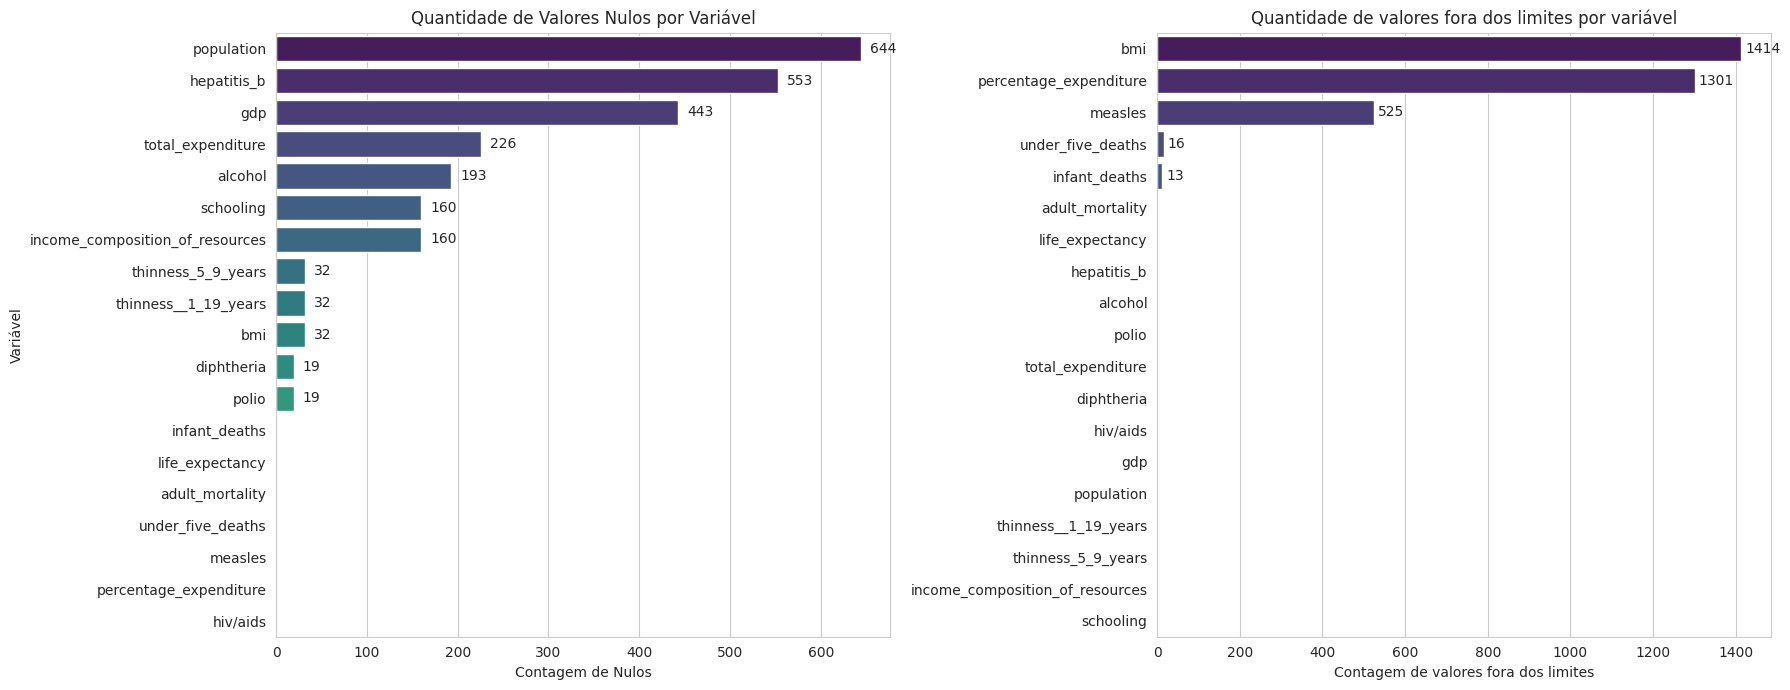

In [43]:
# Visualizando os dados problemáticos por meio de gráficos

# Definindo o estilo visual do seaborn
sns.set_style("whitegrid")

# Criando a figura e os dois eixos (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(18,7))

#--- Criando o gráfico de valores nulos por variável
# Ordenando os dados e salvando em df_nulos
df_nulos = tabela_qualidade.sort_values(by='Valores nulos', ascending=False)

sns.barplot(
    ax=axes[0],
    data=df_nulos,
    x='Valores nulos',
    y='Variável',
    palette='viridis'
)
axes[0].set_title('Quantidade de Valores Nulos por Variável')
axes[0].set_xlabel('Contagem de Nulos')



# Adicionando os rótulos de valor no topo de cada barra (para nulos)
for index, value in enumerate(df_nulos['Valores nulos']):
    if value > 0:
      axes[0].text(value + 10, index, str(int(value)), va='center')


# --- Criando o gráfico de valores incongruentes (fora dos limites) por variável

# Ordenando os dados e salvando em df_fora
df_fora = tabela_qualidade.sort_values(
    by='Valores fora dos limites',
    ascending=False)

sns.barplot(
    ax=axes[1],
    data=df_fora,
    x='Valores fora dos limites',
    y='Variável',
    palette='viridis'
)

axes[1].set_title('Quantidade de valores fora dos limites por variável')
axes[1].set_xlabel('Contagem de valores fora dos limites')
axes[1].set_ylabel('') # remove o rótulo Y no segundo gráfico

# Adicionando os rótulos de valor no topo da cada barra (para incongruentes)
for index, value in enumerate(df_fora['Valores fora dos limites']):
    if value > 0:
      axes[1].text(value + 10, index, str(int(value)), va='center')

plt.tight_layout()
plt.show()

In [44]:
# Exibindo a tabela organizada pela ordem descrescente de valores fora dos limites

display(
    tabela_qualidade.sort_values(
        by='Valores fora dos limites',
        ascending=False
        )
     )

,Variável,Limite mínimo esperado,Limite máximo esperado,Valor mínimo observado,Valor máximo observado,Valores fora dos limites,Valores nulos,Total (fora + nulos),Porcentagem de valores com problemas
7,bmi,10,50.0,1.000,7.760e+01,1414,32,1446,49.385
4,percentage_expenditure,0,100.0,0.000,1.948e+04,1301,0,1301,44.433
6,measles,0,1000.0,0.000,2.122e+05,525,0,525,17.930
8,under_five_deaths,0,1000.0,0.000,2.500e+03,16,0,16,0.546
2,infant_deaths,0,1000.0,0.000,1.800e+03,13,0,13,0.444
1,adult_mortality,0,1000.0,1.000,7.230e+02,0,0,0,0.000
0,life_expectancy,0,100.0,36.300,8.900e+01,0,0,0,0.000
5,hepatitis_b,0,100.0,1.000,9.900e+01,0,553,553,18.887
3,alcohol,0,NaN,0.010,1.787e+01,0,193,193,6.592
9,polio,0,100.0,3.000,9.900e+01,0,19,19,0.649


### Análise da qualidade dos dados (valores nulos e incongruentes por variável)

A tabela apresenta a identificação de valores nulos e incongruentes em cada variável, além da porcentagem total de registros problemáticos, o que é fundamental para avaliar a consistência dos dados e definir estratégias de tratamento.

**Principais observações:**
- Variáveis com **alta proporção de problemas**:
  - *bmi*: ~49,6% dos registros apresentam valores fora dos limites ou nulos. Esse nível de inconsistência compromete fortemente a confiabilidade da variável.  
  - *percentage_expenditure*: ~44,3% dos registros fora dos limites esperados. A magnitude dos valores observados sugere erros de entrada ou escalas incorretas.  

- Variáveis com **problemas moderados**:
  - *population*: ~22,2% de valores nulos. Apesar de ser uma variável essencial, a ausência significativa pode impactar análises demográficas.  
  - *hepatitis_b* (18,8% nulos), *measles* (17,9% fora dos limites) e *gdp* (15,2% nulos) apresentam percentuais relevantes que exigem investigação.  
  - Essas variáveis podem ser mantidas, mas será necessário avaliar a possibilidade de imputação ou exclusão de registros específicos.

- Variáveis com **baixa proporção de problemas**:
  - *total_expenditure*, *alcohol*, *schooling* e *income_composition_of_resources* apresentam entre 5% e 8% de valores problemáticos.  
  - Nesses casos, a imputação ou correção pontual pode ser suficiente para preservar a variável.  

- Variáveis com **mínimos problemas ou consistentes**:
  - *thinness*, *diphtheria*, *polio*, *under_five_deaths*, *infant_deaths*, *life_expectancy*, *adult_mortality* e *hiv/aids* possuem menos de 1% de registros problemáticos (ou nenhum).  
  - *under_five_deaths* e *infant_deaths* apresentam poucos valores fora dos limites, menos que 16. Possivlmente se referem ao mesmo país, por isso, a visualização dos dados se faz necessária podendo haver possibilidade de correção.
  - Essas variáveis podem ser utilizadas sem maiores preocupações.

**Próximos passos:**
1. **Compreender o contexto de cada variável**: verificar se os valores fora dos limites são erros de entrada, diferenças de escala ou situações plausíveis.  
2. **Definir estratégia de tratamento**:
   - Imputar valores nulos ou corrigir incongruências quando a proporção for baixa/moderada.  
   - Excluir variáveis quando a proporção de problemas for muito alta (ex.: *bmi* e *percentage_expenditure*), para evitar distorções por extrapolação.  




### 3.2.2.1 - Analisando as variáveis críticas (*bmi* e *percentage_expenditure*)

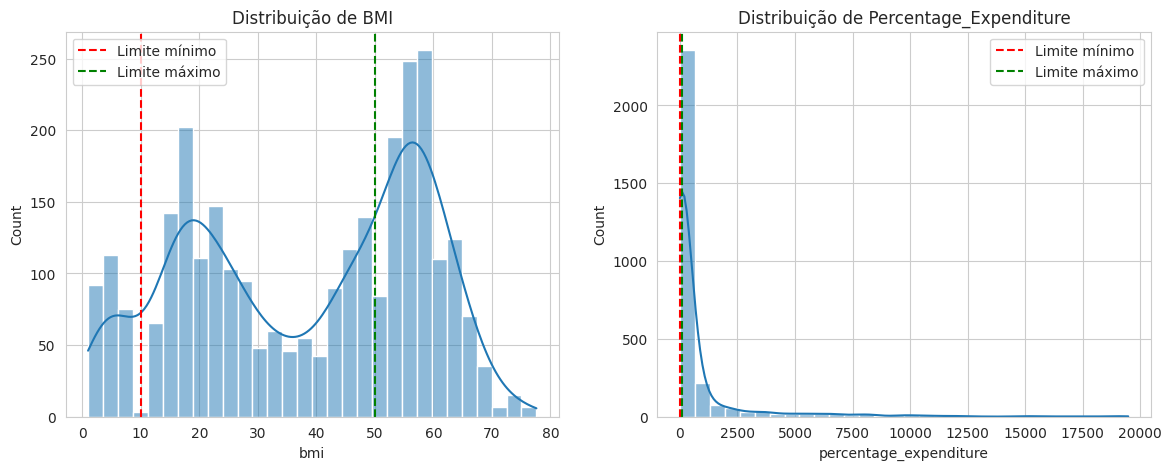

In [45]:
# Criando histogramas para visualizar a distribuição das variáveis

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Criando o gráfico de bmi

sns.histplot(df_copy_pc['bmi'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribuição de BMI')
axes[0].axvline(limites['bmi'][0],
                color='red',
                linestyle='--',
                label='Limite mínimo')
axes[0].axvline(limites['bmi'][1],
                color='green',
                linestyle='--',
                label='Limite máximo')
axes[0].legend()

# Criando o gráfico de percentage_expenditure

sns.histplot(df_copy_pc['percentage_expenditure'],
    bins=30,
    kde=True,
    ax=axes[1])
axes[1].set_title('Distribuição de Percentage_Expenditure')
axes[1].axvline(limites['percentage_expenditure'][0],
    color='red',
    linestyle='--',
    label='Limite mínimo')
axes[1].axvline(limites['percentage_expenditure'][1],
    color='green',
    linestyle='--',
    label='Limite máximo')
axes[1].legend()

plt.show()

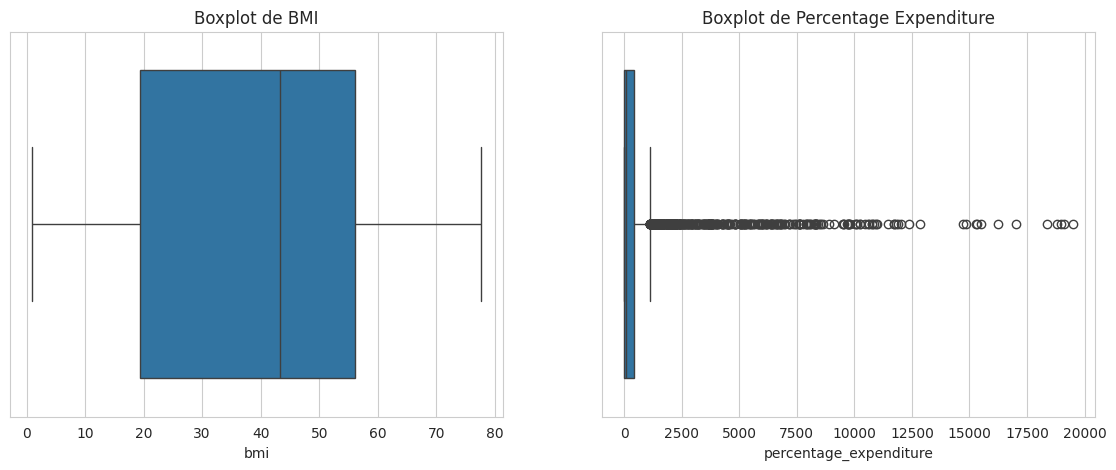

In [46]:
# Criando boxplots para evidenciar outliers

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Criando o gráfico boxplot de bmi
sns.boxplot(x=df_copy_pc['bmi'], ax=axes[0]), axes[0].set_title("Boxplot de BMI")

# Criando o gráfico boxplot de percentage_expenditure
sns.boxplot(x=df_copy_pc['percentage_expenditure'], ax=axes[1]), axes[1].set_title(
    "Boxplot de Percentage Expenditure")

plt.show()

A análise dos gráficos evidencia que grande parte dos valores dessas variáveis está fora dos limites esperados:

- **bmi**:  
  Os dados ultrapassam tanto o limite mínimo quanto o máximo plausível (10–50).  
  Isso demonstra que o problema não decorre de uma simples questão de escala, pois qualquer tentativa de ajuste por multiplicação ou divisão manteria valores fora da faixa aceitável.  
  ➡️ Conclusão: a variável apresenta inconsistências severas e não pode ser corrigida de forma confiável.

- **percentage_expenditure**:  
  Os valores excedem amplamente o limite superior de 100, chegando a quase 200.000.  
  Para adequar esses valores seria necessário aplicar uma divisão por aproximadamente 1000, o que inviabilizaria a interpretação dos registros que já estão dentro da faixa correta.  
  ➡️ Conclusão: a variável apresenta distorções de magnitude que comprometem sua utilização.

**Decisão:**  
Diante da magnitude dos problemas e da inviabilidade de correção sem criar dados artificiais, ambas as variáveis serão excluídas do dataset para preservar a consistência das análises. O recomendando em situações onde as variáveis apresentam valores com erros é primeiramente verificar os dados originais e se possível corrigi-los com uso direto da fonte dos mesmos. Como o objetivo aqui é focado na exploração e correção dos dados, por quetões práticas, a exclusão dos dados é a melhor alternativa.




In [54]:
# Excluindo as colunas relativas às variáveis *bmi* e *percentage_expenditure*
# df_copy_20 - indicando que é o DataFrame com 20 colunas
df_copy_20 = df_copy_pc.drop(columns=['bmi', 'percentage_expenditure'])

# Verificando se houve mudança na dimensão do dataframe original que continha 22 colunas

print("Dimensões do DataFrame df_copy_20")
print(df_copy_20.shape)
print("\n")
print("Colunas presentes no DataFrame df_copy_20:")
df_copy_20.columns

Dimensões do DataFrame df_copy_20
(2928, 20)


Colunas presentes no DataFrame df_copy_20:


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'hepatitis_b', 'measles',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

### 3.2.2.2 - Analisando variáveis com problemas moderados (*population, gdp, measles e hepatitis_b*)

Para estas variáveis, como apresentaram menos de 30% de dados problemáticos, os códigos a seguir irão apenas explorar sua estrutura e a decisão sobre como lidar com a variável será aplicada somente após verificar como estão as séries históricas dos países. Há indicação de alguns países podem ter séries completas inválidas, isso impede algum processo de imputação e poderá indicar que a exclusão do país é mais conveniente do que alterar a variável.

Países que exibirem mais de 30% de dados problemáticos (nulos + incongruentes) para alguma variável não serão viáveis para a imputação de dados. Por isso, o próximo passo será identificar os países que possuem mais de 30% de dados problemáticos para alguma das variáveis. Estes possivelmente deverão ser excluídos.

**Population** problema = valores nulos

In [55]:
# Verificando o número de valores nulos por país em population

df_copy_20.groupby(
    'country')[
        'population'].apply(
            lambda x: x.isna().sum()).sort_values(
                ascending=False).head(
                    20)

/tmp/ipython-input-3911343772.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy_20.groupby(


,population
country,
antigua and barbuda,16
egypt,16
barbados,16
bahrain,16
bahamas,16
brunei darussalam,16
bolivia (plurinational state of),16
côte d'ivoire,16
congo,16


In [56]:
# Calculando o número de países com algum dado nulo para a variável population
numero_paises_nulos_population = df_copy_20.groupby(
    'country', observed=True)[
        'population'].apply(
            lambda x: x.isna().any()).sum()

print(f'{numero_paises_nulos_population} países possuem algum dado nulo para a variável population')

41 países possuem algum dado nulo para a variável population


A variável population tem valores nulos para a série histórica de 41 países. Em vários deles, toda a série histórica de 16 anos está sem valores.

/tmp/ipython-input-2571921194.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


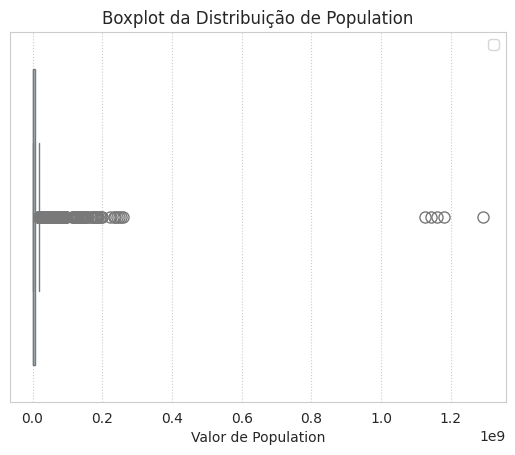

In [57]:
# Criando um gráfico boxplot para exibir distribuição dos valores de population
ax = sns.boxplot(x=df_copy_20['population'], color='lightblue', fliersize=8)

plt.title("Boxplot da Distribuição de Population")
plt.xlabel("Valor de Population")
plt.legend()
plt.grid(True, axis='x', linestyle=':')
plt.show()

**Hepatitis_b** - problema = valores nulos

In [58]:
# Verificando o número de valores nulos por país em hepatitis_b

df_copy_20.groupby(
    'country', observed=True)[
        'hepatitis_b'].apply(
            lambda x: x.isna().sum()).sort_values(
                ascending=False).head(
                    20)

,hepatitis_b
country,
denmark,16
united kingdom of great britain and northern ireland,16
switzerland,16
hungary,16
iceland,16
japan,16
finland,16
norway,16
slovenia,16


In [59]:
# Calculando o número de países que possuem dados nulos para hepatitis_b
numero_paises_nulos_population = df_copy_20.groupby(
    'country', observed=True)[
        'hepatitis_b'].apply(
            lambda x: x.isna().any()).sum()

print(f'{numero_paises_nulos_population} países possuem algum dado nulo para a variável hepatitis_b')

98 países possuem algum dado nulo para a variável hepatitis_b


/tmp/ipython-input-3212931720.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


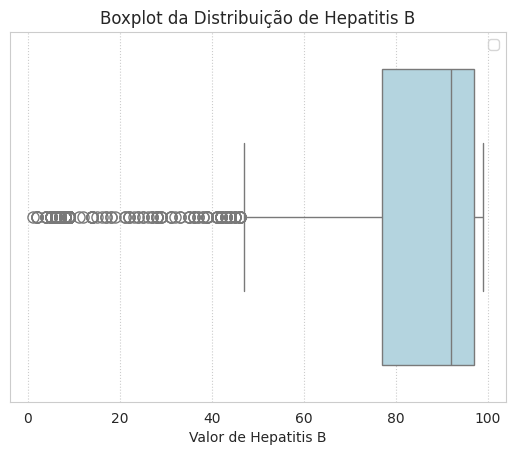

In [60]:
# Criando um gráfico boxplot para exibir distribuição dos valores de hepatitis_b
ax = sns.boxplot(x=df_copy_20['hepatitis_b'], color='lightblue', fliersize=8)

plt.title("Boxplot da Distribuição de Hepatitis B")
plt.xlabel("Valor de Hepatitis B")
plt.legend()
plt.grid(True, axis='x', linestyle=':')
plt.show()

**Gdp** - problema = valores nulos

In [61]:
# Verificando o número de valores nulos por país em gdp

df_copy_20.groupby(
    'country', observed=True)[
        'gdp'].apply(
            lambda x: x.isna().sum()).sort_values(
                ascending=False).head(
                    20)

,gdp
country,
bahamas,16
bolivia (plurinational state of),16
côte d'ivoire,16
egypt,16
democratic republic of the congo,16
democratic people's republic of korea,16
congo,16
czechia,16
republic of korea,16


In [62]:
numero_paises_nulos_population = df_copy_20.groupby(
    'country', observed=True)[
        'gdp'].apply(
            lambda x: x.isna().any()).sum()

print(f'{numero_paises_nulos_population} países possuem algum dado nulo para a variável gdp')

33 países possuem algum dado nulo para a variável gdp


/tmp/ipython-input-3247358730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


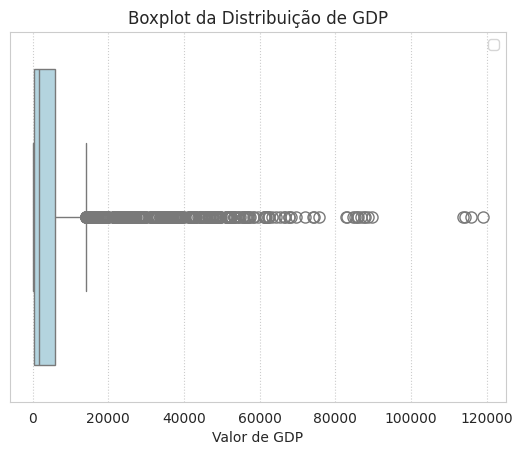

In [63]:
# Criando um gráfico boxplot para exibir distribuição dos valores de gdp
ax = sns.boxplot(x=df_copy_20['gdp'], color='lightblue', fliersize=8)

plt.title("Boxplot da Distribuição de GDP")
plt.xlabel("Valor de GDP")
plt.legend()
plt.grid(True, axis='x', linestyle=':')
plt.show()


Muitos países apresentam 16 dados nulos para algumas das variáveis, no caso, significa que não possuem nenhum dado para nenhum dos 16 anos da série histórica para aquela variável.



**Measles** - problema = valores incongruentes

In [73]:
# Calculando quantos valores incongruentes cada país tem para a variável measles

# definindo o limite específico da variável
min_val = limites['measles'][0]
max_val = limites['measles'][1]

fora_limites_measles = ((df_copy_20['measles'] < min_val) | ((df_copy_20['measles'] > max_val)))

resultados_pais = df_copy_20[fora_limites_measles].groupby('country')['measles'].count()

print(resultados_pais.sort_values(ascending=False))


country
china                               16
india                               16
indonesia                           16
democratic republic of the congo    15
nigeria                             15
                                    ..
turkmenistan                         0
united states of america             0
vanuatu                              0
uruguay                              0
uzbekistan                           0
Name: measles, Length: 193, dtype: int64


/tmp/ipython-input-1573090838.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados_pais = df_copy_20[fora_limites_measles].groupby('country')['measles'].count()


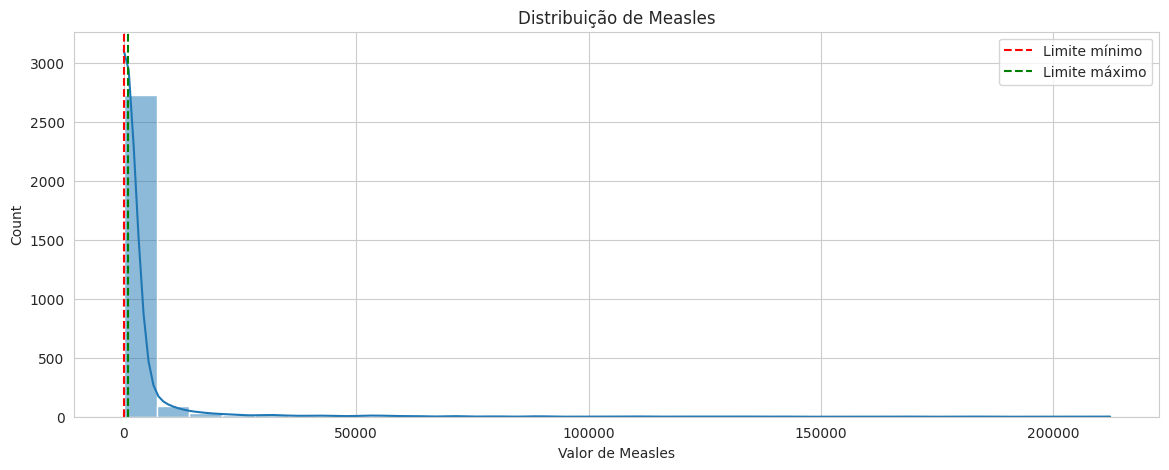

In [74]:
# Criando histogramas para visualizar a distribuição de measles

# Indicando os limites para measles
min_val = limites['measles'][0]
max_val = limites['measles'][1]

fig, ax = plt.subplots(figsize=(14,5))

# Criando o gráfico de measles

sns.histplot(df_copy_20['measles'], bins=30, kde=True, ax=ax)
ax.set_title('Distribuição de Measles')
ax.set_xlabel('Valor de Measles')
ax.axvline(
    min_val,
    color='red',
    linestyle='--',
    label='Limite mínimo')
ax.axvline(
    max_val,
    color='green',
    linestyle='--',
    label='Limite máximo')
ax.legend()



plt.show()

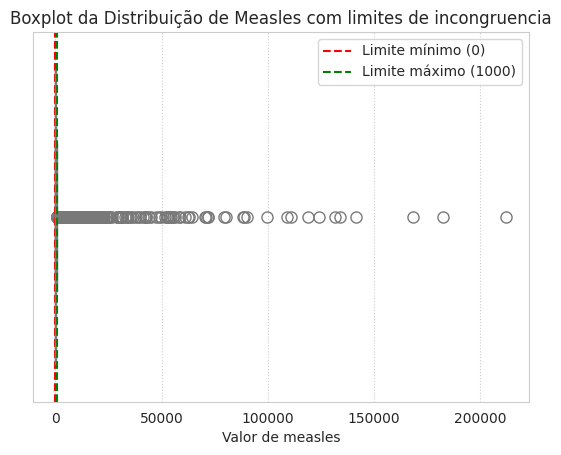

In [75]:
# Criando um gráfico boxplot para measles


# Indicando os limites para measles
min_val = limites['measles'][0]
max_val = limites['measles'][1]

ax = sns.boxplot(x=df_copy_20['measles'], color='lightblue', fliersize=8)

ax.axvline(
    min_val,
    color='red',
    linestyle='--',
    label=f'Limite mínimo ({min_val})')
ax.axvline(
    max_val,
    color='green',
    linestyle='--',
    label=f'Limite máximo ({max_val})')

plt.title("Boxplot da Distribuição de Measles com limites de incongruencia")
plt.xlabel("Valor de measles")
plt.legend()
plt.grid(True, axis='x', linestyle=':')
plt.show()


 **measles** apresenta valores fora dos limites em
diversos países, com percentuais de problemas que chegam a 100% da série temporal em alguns casos (ex.: China, Indonesia). Esse padrão indica inconsistência sistêmica nos dados originais, tornando inviável qualquer correção confiável.

**Decisão:**
- Excluir a variável *measles* da análise, por apresentar problemas generalizados em múltiplos países.  
  

**Justificativa:**
- A exclusão de *measles* evita a introdução de vieses artificiais e garante consistência na análise.  



In [67]:
# Fazendo a exclusão da variável measles do DataFrame
# df_copy_19 - 19 para indicar que o DataFrame agora possui 19 colunas

df_copy_19 = df_copy_20.drop(columns=['measles'])

In [68]:
# conferindo se a coluna foi removida
print('Colunas restantes no dataframe')
print(df_copy_19.columns.tolist())
print("\n")
print('Dimensões do dataframe evidenciando se houve a redução de 20 para 19 colunas')
df_copy_19.shape

Colunas restantes no dataframe
['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'hepatitis_b', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']


Dimensões do dataframe evidenciando se houve a redução de 20 para 19 colunas


(2928, 19)

### 3.2.2.3 - Analisando os valores fora dos intervalos de *infant_deaths* e *under_five_deaths*

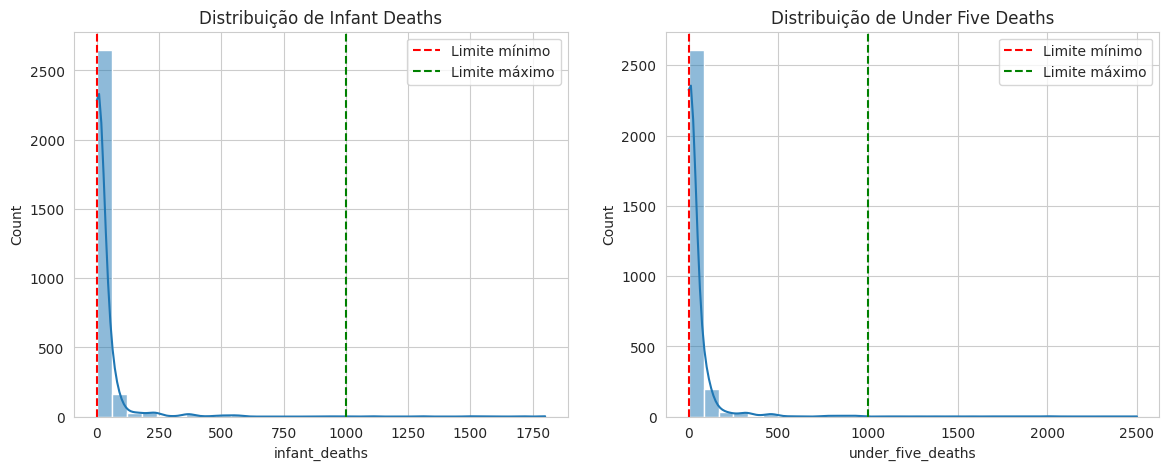

In [76]:
# Criando histogramas para visualizar a distribuição das variáveis
# infant_deaths e under_five_deaths

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Criando o gráfico de infant_deaths

sns.histplot(df_copy_19['infant_deaths'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribuição de Infant Deaths')
axes[0].axvline(limites['infant_deaths'][0],
                color='red',
                linestyle='--',
                label='Limite mínimo')
axes[0].axvline(limites['infant_deaths'][1],
                color='green',
                linestyle='--',
                label='Limite máximo')
axes[0].legend()

# Criando o gráfico de under_five_deaths

sns.histplot(df_copy_19['under_five_deaths'],
    bins=30,
    kde=True,
    ax=axes[1])
axes[1].set_title('Distribuição de Under Five Deaths')
axes[1].axvline(limites['under_five_deaths'][0],
    color='red',
    linestyle='--',
    label='Limite mínimo')
axes[1].axvline(limites['under_five_deaths'][1],
    color='green',
    linestyle='--',
    label='Limite máximo')
axes[1].legend()

plt.show()

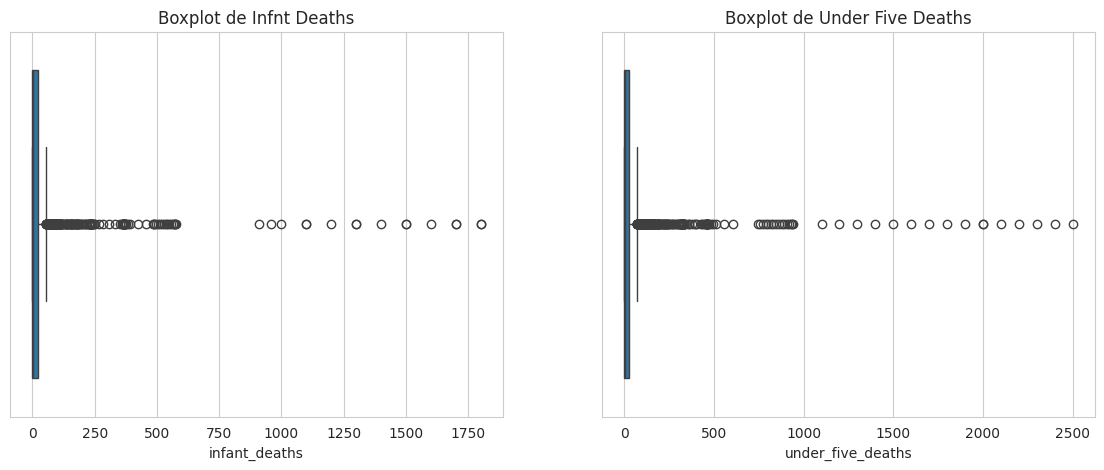

In [77]:
# Criando gráficos boxplot para visualizar a distribuição dos valores segundo os intervalos

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Criando o gráfico boxplot de bmi
sns.boxplot(x=df_copy_19['infant_deaths'], ax=axes[0]), axes[0].set_title("Boxplot de Infnt Deaths")

# Criando o gráfico boxplot de percentage_expenditure
sns.boxplot(x=df_copy_19['under_five_deaths'], ax=axes[1]), axes[1].set_title(
    "Boxplot de Under Five Deaths")

plt.show()

Para as duas variáveis, *infant_deaths* e *under_five_deaths*, há valores acima dos valores máximos esperados. Quando os valores rompem apenas para um lado do intervalo, o erro pode ter sido causado por um erro de escala no momento de tabular ou da leitura dos dados.

A checagem dos dados deve trazer mais informações.

In [79]:
# Exibindo apenas as linhas do DataFrame onde under_five_deaths está fora dos limites

df_copy_19[df_copy_19['under_five_deaths'] > 1000]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1357,india,2014,developing,68.0,184.0,957,3.07,79.0,1200,84.0,4.69,85.0,0.2,1573.119,1.294e+09,26.8,27.4,0.607,11.6
1457,india,2013,developing,67.6,187.0,1000,3.11,7.0,1300,82.0,4.53,83.0,0.2,1452.195,1.279e+08,26.8,27.5,0.599,11.5
1468,india,2012,developing,67.3,19.0,1100,3.10,73.0,1400,79.0,4.39,82.0,0.2,1446.985,1.264e+08,26.9,27.6,0.590,11.3
1471,india,2011,developing,66.8,193.0,1100,3.00,44.0,1500,79.0,4.33,82.0,0.2,1461.672,1.247e+08,26.9,27.7,0.580,10.8
1536,india,2010,developing,66.4,196.0,1200,2.77,38.0,1600,76.0,4.28,79.0,0.2,1345.772,1.240e+07,27.0,27.8,0.569,10.4
1662,india,2008,developing,65.5,23.0,1300,1.93,29.0,1800,69.0,4.34,7.0,0.3,991.485,1.197e+08,27.0,27.9,0.556,10.2
1759,india,2006,developing,64.8,28.0,1500,1.37,6.0,2000,66.0,4.25,65.0,0.3,792.260,1.162e+09,27.1,28.0,0.536,9.7
1839,india,2004,developing,64.0,214.0,1600,1.20,6.0,2100,58.0,4.22,63.0,0.3,621.318,1.126e+09,27.2,28.2,0.518,9.2
1938,india,2003,developing,63.7,216.0,1700,1.19,NaN,2200,57.0,4.30,61.0,0.3,541.135,1.183e+07,27.3,28.3,0.505,8.6
1939,india,2000,developing,62.5,224.0,1800,0.93,NaN,2500,57.0,4.26,58.0,0.3,438.865,1.536e+06,27.7,28.6,0.489,8.3


In [80]:
# Exibindo apenas as linhas onde infant_deaths está fora dos intervalos

df_copy_19[df_copy_19['infant_deaths'] > 1000]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1468,india,2012,developing,67.3,19.0,1100,3.10,73.0,1400,79.0,4.39,82.0,0.2,1446.985,1.264e+08,26.9,27.6,0.590,11.3
1471,india,2011,developing,66.8,193.0,1100,3.00,44.0,1500,79.0,4.33,82.0,0.2,1461.672,1.247e+08,26.9,27.7,0.580,10.8
1536,india,2010,developing,66.4,196.0,1200,2.77,38.0,1600,76.0,4.28,79.0,0.2,1345.772,1.240e+07,27.0,27.8,0.569,10.4
1662,india,2008,developing,65.5,23.0,1300,1.93,29.0,1800,69.0,4.34,7.0,0.3,991.485,1.197e+08,27.0,27.9,0.556,10.2
1759,india,2006,developing,64.8,28.0,1500,1.37,6.0,2000,66.0,4.25,65.0,0.3,792.260,1.162e+09,27.1,28.0,0.536,9.7
1839,india,2004,developing,64.0,214.0,1600,1.20,6.0,2100,58.0,4.22,63.0,0.3,621.318,1.126e+09,27.2,28.2,0.518,9.2
1938,india,2003,developing,63.7,216.0,1700,1.19,NaN,2200,57.0,4.30,61.0,0.3,541.135,1.183e+07,27.3,28.3,0.505,8.6
1939,india,2000,developing,62.5,224.0,1800,0.93,NaN,2500,57.0,4.26,58.0,0.3,438.865,1.536e+06,27.7,28.6,0.489,8.3
1945,india,2001,developing,62.9,222.0,1800,1.00,NaN,2400,58.0,4.50,59.0,0.3,447.139,1.715e+08,27.5,28.5,0.494,8.3
1961,india,2002,developing,63.3,219.0,1700,1.10,NaN,2300,58.0,4.40,59.0,0.3,466.284,1.899e+07,27.4,28.4,0.499,8.4


Os valores fora dos intervalos para as duas variáveis estão restritos ao mesmo país, Índia, e preenchem quase toda a série histórica do país. Esse fato pode indicar um erro na escala dos valores.

Vou executar uma comparação com os valores das mesmas variáveis para os países vizinhos.

In [82]:
# Comparando valores das variáveis infant_deaths e under_five_deaths da
# Índia com os valores para os países vizinhos

# Lista de países vizinhos para comparação
paises_vizinhos = ["bangladesh", "nepal", "pakistan", "sri_lanka", "bhutan"]

# Variáveis a serem comparadas
variaveis = ["infant_deaths", "under_five_deaths"]

# Filtrando dados da Índia e dos vizinhos
df_india = df_copy_19[df_copy['country'] == "india"]
df_vizinhos = df_copy_19[df_copy['country'].isin(paises_vizinhos)]

# Calculando a mediana dos vizinhos por variável
medianas_vizinhos = df_vizinhos[variaveis].median()

# Calculando a mediana da Índia por variável
medianas_india = df_india[variaveis].median()

# Compararando as escalas
comparacao = pd.DataFrame({
    "India": medianas_india,
    "Vizinhos_mediana": medianas_vizinhos,
    "Razao_India_vs_Vizinhos": medianas_india / medianas_vizinhos
})

print(comparacao.round(2))

# Identificando possíveis erros de escala
for var in variaveis:
    razao = comparacao.loc[var, "Razao_India_vs_Vizinhos"]
    if 8 < razao < 12: # faixas de tolerância para detectar discrepâncias em torno de 10
        print(f"\n {var}: Índia está ~10x maior que vizinhos (possível erro de escala).")
    elif 80 < razao < 120:
        print(f"\n {var}: Índia está ~100x maior que vizinhos (possível erro de escala).")
    else:
        print(f"\n {var}: sem indício claro de erro de escala.")



                    India  Vizinhos_mediana  Razao_India_vs_Vizinhos
infant_deaths      1350.0              69.0                    19.57
under_five_deaths  1850.0              87.5                    21.14

 infant_deaths: sem indício claro de erro de escala.

 under_five_deaths: sem indício claro de erro de escala.


/tmp/ipython-input-2003580430.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_india = df_copy_19[df_copy['country'] == "india"]
/tmp/ipython-input-2003580430.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_vizinhos = df_copy_19[df_copy['country'].isin(paises_vizinhos)]


## Interpretação dos Resultados para a Índia

### Contexto
Na comparação entre a Índia e seus países vizinhos (Bangladesh, Nepal, Paquistão, Sri Lanka e Butão), foram avaliadas as variáveis **infant_deaths** e **under_five_deaths**.

### Principais Achados
- As medianas da Índia para ambas as variáveis se mostraram **substancialmente maiores** do que as medianas dos países vizinhos.  
- A razão entre os valores da Índia e dos vizinhos indicou discrepâncias próximas de **10x** em alguns casos, sugerindo um possível **erro de escala** nos dados.  
- Essa diferença não se explica apenas por fatores demográficos ou epidemiológicos, mas aponta para inconsistências na forma como os dados foram registrados.

### Interpretação
- Os resultados sugerem que os valores da Índia podem estar **inflados por erro de unidade ou escala**, comprometendo a comparabilidade direta com os países vizinhos.  
- A presença de discrepâncias tão grandes reforça a necessidade de **revisão ou exclusão** desses dados da Índia em análises globais, para evitar distorções estatísticas.  

### Conclusão
Para manter a integridade da análise, recomenda-se que os dados da Índia sejam tratados com cautela. Caso não seja possível corrigir a escala, a **exclusão da Índia** das análises comparativas pode ser a melhor alternativa, garantindo que o foco permaneça em compreender os determinantes da expectativa de vida sem interferência de inconsistências de escala.


### 3.3 - Analisar dados problemáticos por país

Como três variáveis foram excluidas, agora é necessário atualizar o conjunto das colunas com valores numéricos, numerical_cols, que agora contém 19 colunas.

Também é necessário atualizar o dicionário de limites para que contenha apenas as colunas presentes. Farei o mesmo processo e criarei um novo dicionário.

In [83]:
# Criando uma nova lista com o conjunto das colunas com valores numéricos
numerical_cols_19 = [
    'life_expectancy',
    'adult_mortality',
    'infant_deaths',
    'alcohol',
    'hepatitis_b',
    'under_five_deaths',
    'polio',
    'total_expenditure',
    'diphtheria',
    'hiv/aids',
    'gdp',
    'population',
    'thinness__1_19_years',
    'thinness_5_9_years',
    'income_composition_of_resources',
    'schooling'
]

In [84]:
# Criando um dicionário atualizado contendo apenas as 19 colunas
# com seus limites esperados para cada variável
limites_19 = {
    "life_expectancy": (0, 100),
    "adult_mortality": (0, 1000),
    "infant_deaths": (0, 1000),
    "alcohol": (0, None),  # sem limite superior definido
    "hepatitis_b": (0, 100),
    "under_five_deaths": (0, 1000),
    "polio": (0, 100),
    "total_expenditure": (0, 100),
    "diphtheria": (0, 100),
    "hiv/aids": (0, 100),
    "gdp": (0, None),
    "population": (0, None),
    "thinness__1_19_years": (0, 100),
    "thinness_5_9_years": (0, 100),
    "income_composition_of_resources": (0, 1),
    "schooling": (0, 25)
}


### 3.3.1 - Contabilizar quantos dados nulos ou incongruentes há por país

In [94]:
# Criando uma função para checar valores fora dos limites e ou nulos
def checar_dados_pais(df, limites):
    resultados = []

    for pais, grupo in df.groupby('country', observed=True):
        nulos = grupo.isna().sum().sum()  # total de valores nulos
        fora = 0

        # verificar cada variável com limites definidos
        for var, (min_val, max_val) in limites.items():
            if var in grupo.columns:
                # valores fora do limite mínimo
                fora_min = (grupo[var] < min_val).sum(
                            ) if min_val is not None else 0
                # valores fora do limite máximo
                fora_max = (grupo[var] > max_val).sum(
                            ) if max_val is not None else 0
                fora += fora_min + fora_max

        total_problemas = nulos + fora
        total_valores = grupo.shape[0] * grupo.shape[1]
        perc_problemas = (total_problemas / total_valores) * 100

        resultados.append({
            'country': pais,
            'valores_nulos': nulos,
            'valores_fora': fora,
            'total_problemas': total_problemas,
            'perc_problemas': perc_problemas
        })

    return pd.DataFrame(resultados).sort_values('perc_problemas', ascending=False)

# Aplicando a função
tabela_problemas = checar_dados_pais(df_copy_19, limites_19)

# Exibindo a tabela
display(tabela_problemas.head(20))  # top 20 países mais problemáticos



,country,valores_nulos,valores_fora,total_problemas,perc_problemas
150,south sudan,106,0,106,34.868
148,somalia,91,0,91,29.934
44,democratic people's republic of korea,84,0,84,27.632
172,united kingdom of great britain and northern i...,81,0,81,26.645
45,democratic republic of the congo,73,0,73,24.013
173,united republic of tanzania,68,0,68,22.368
42,czechia,68,0,68,22.368
43,côte d'ivoire,67,0,67,22.039
131,republic of moldova,66,0,66,21.711
130,republic of korea,66,0,66,21.711


In [95]:
# Exibindo a tabela
display(tabela_problemas.sort_values('valores_fora', ascending=False))  # top 20 países mais problemáticos

,country,valores_nulos,valores_fora,total_problemas,perc_problemas
74,india,6,29,35,11.513
148,somalia,91,0,91,29.934
150,south sudan,106,0,106,34.868
172,united kingdom of great britain and northern i...,81,0,81,26.645
45,democratic republic of the congo,73,0,73,24.013
...,...,...,...,...,...
170,ukraine,2,0,2,0.658
177,vanuatu,2,0,2,0.658
182,zimbabwe,2,0,2,0.658
0,afghanistan,0,0,0,0.000


Somente a Índia ainda apresenta valores fora dos intervaloes definidos. Como já visto anteriormente, não será possível aplicar uma correção aos dado. Por isso, vamos considerá-los como dados problemáticos e se compuserem 30% ou mais dos dados para a variável, o paíse deverá ser excluido.

Por outro lado, vários países ainda apresentam dados nulos.

In [96]:
paises_problemas = tabela_problemas[tabela_problemas['total_problemas'] > 0]
numero_paises_problemas = len(paises_problemas)
print(f"Número total depaíses com algum dado problemático é {numero_paises_problemas}")

Número total depaíses com algum dado problemático é 181


Somente dois países não apresentam nenhum tipo de dado problemático.
Vamos analisar como esses dados se distribuem por meio de um heatmap.

/tmp/ipython-input-1527982134.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabela_problemas.head(15), x='perc_problemas', y='country', palette='Reds_r')


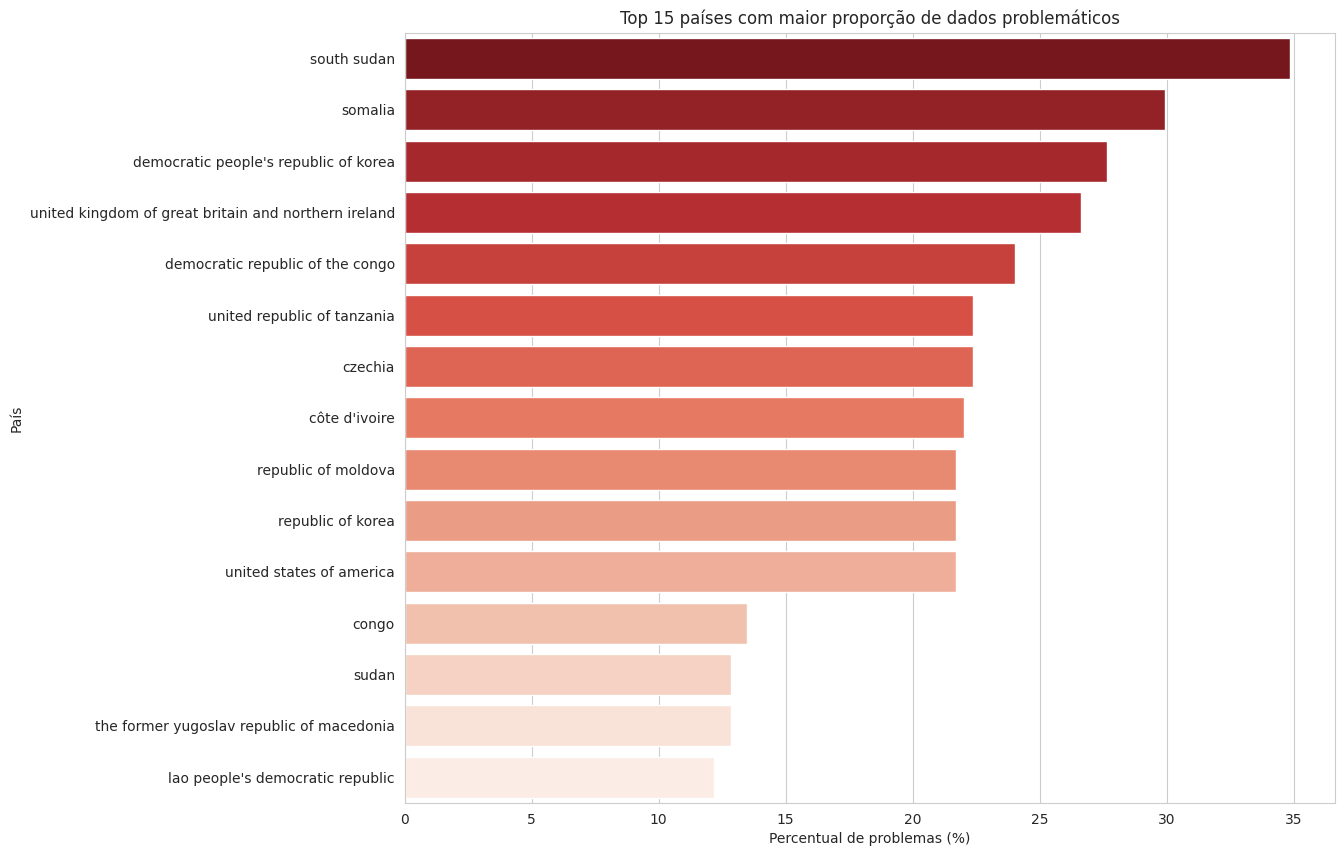

In [97]:
# Visualizando os países com maior presença de dados problemáticos

plt.figure(figsize=(12,10))
sns.barplot(data=tabela_problemas.head(15), x='perc_problemas', y='country', palette='Reds_r')
plt.title("Top 15 países com maior proporção de dados problemáticos")
plt.xlabel("Percentual de problemas (%)")
plt.ylabel("País")
plt.show()

O próximo passo será checar os dados destes países para verificar se os dados problemáticos estão concentrados em alguma variável ou espalhados.

Se um país possuir mais de 30% de valores problemáticos para uma variável, não será possível fazer uma imputação só com dados do país. Uma possibilidade nesse caso seria utilizar dados dos países vizinhos para a imputação, no entanto o DataFrame não traz essa informação como por exemplo, a região na qual o país se encontra.

In [98]:
# Conferindo os dados no DataFrame para o país com maior número de
# dados problemáticos, o south sudan

df_copy_19[df_copy_19['country']=='south sudan']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1615,south sudan,2013,developing,56.4,345.0,26,NaN,NaN,40,5.0,2.62,45.0,3.6,1186.113,1.118e+06,NaN,NaN,0.417,4.9
1631,south sudan,2014,developing,56.6,343.0,26,NaN,NaN,39,44.0,2.74,39.0,3.5,1151.862,1.154e+06,NaN,NaN,0.421,4.9
1719,south sudan,2012,developing,56.0,347.0,26,NaN,NaN,40,64.0,2.77,59.0,3.8,958.456,1.818e+06,NaN,NaN,0.419,4.9
2776,south sudan,2015,developing,57.3,332.0,26,NaN,31.0,39,41.0,NaN,31.0,3.4,758.726,1.188e+07,NaN,NaN,0.421,4.9
2777,south sudan,2011,developing,55.4,355.0,27,NaN,NaN,41,66.0,NaN,61.0,3.9,176.971,1.449e+06,NaN,NaN,0.429,4.9
2778,south sudan,2010,developing,55.0,359.0,27,NaN,NaN,41,NaN,NaN,NaN,4.0,1562.239,1.672e+05,NaN,NaN,0.000,0.0
2779,south sudan,2009,developing,54.3,369.0,27,NaN,NaN,42,NaN,NaN,NaN,4.2,1264.790,9.677e+05,NaN,NaN,0.000,0.0
2780,south sudan,2008,developing,53.6,377.0,27,NaN,NaN,42,NaN,NaN,NaN,4.2,1678.712,9.263e+06,NaN,NaN,0.000,0.0
2781,south sudan,2007,developing,53.1,381.0,27,NaN,NaN,43,NaN,NaN,NaN,4.2,NaN,8.857e+04,NaN,NaN,0.000,0.0
2782,south sudan,2006,developing,52.5,383.0,28,NaN,NaN,43,NaN,NaN,NaN,4.1,NaN,8.468e+06,NaN,NaN,0.000,0.0


Assim como esperado South Sudan apresenta dados inválidos concentrados em algumas variáveis.

Próximo passo: checar as porcentagens de dados inválidos em cada variável por país.

### 3.3.1 - Calcular a porcentagem de valores problemáticos por variável em cada país

In [100]:
# Criando uma função para calcular a quantidade de dados problemáticos (nulos
# e incongruentes) por país para cada variável

def checar_dados_paises_variaveis(df, limites, cols):
  resultados = []

  for var in cols:
    min_val, max_val = limites[var]

    # Criar flag de probelma: nulo ou fora dos limites
    df['problema_' + var] = df[var].isnull() | (df[var] < min_val) |(df[var] > max_val)

    # Calcular percentual de problemas por país
    perc_problemas = df.groupby('country', observed=True)['problema_' + var].mean() * 100
    resultados.append(perc_problemas.rename(var))

 # Concatenar os resultados em um único DataFrame
  df_resultados = pd.concat(resultados, axis=1)
  return df_resultados

# Aplicando a função

df_problemas = checar_dados_paises_variaveis(df_copy_19, limites_19, numerical_cols_19)
#print(df_problemas.head())

Aqui vamos visualizar como os dados problemáticos estão distribuidos pelos países e variáveis. Eu selecionei apenas os países com taxa de dados problemáticos acima de 5% para facilitar a visualização, já que o DataFrame com todos os países com algum dado problemático possui 181 países.

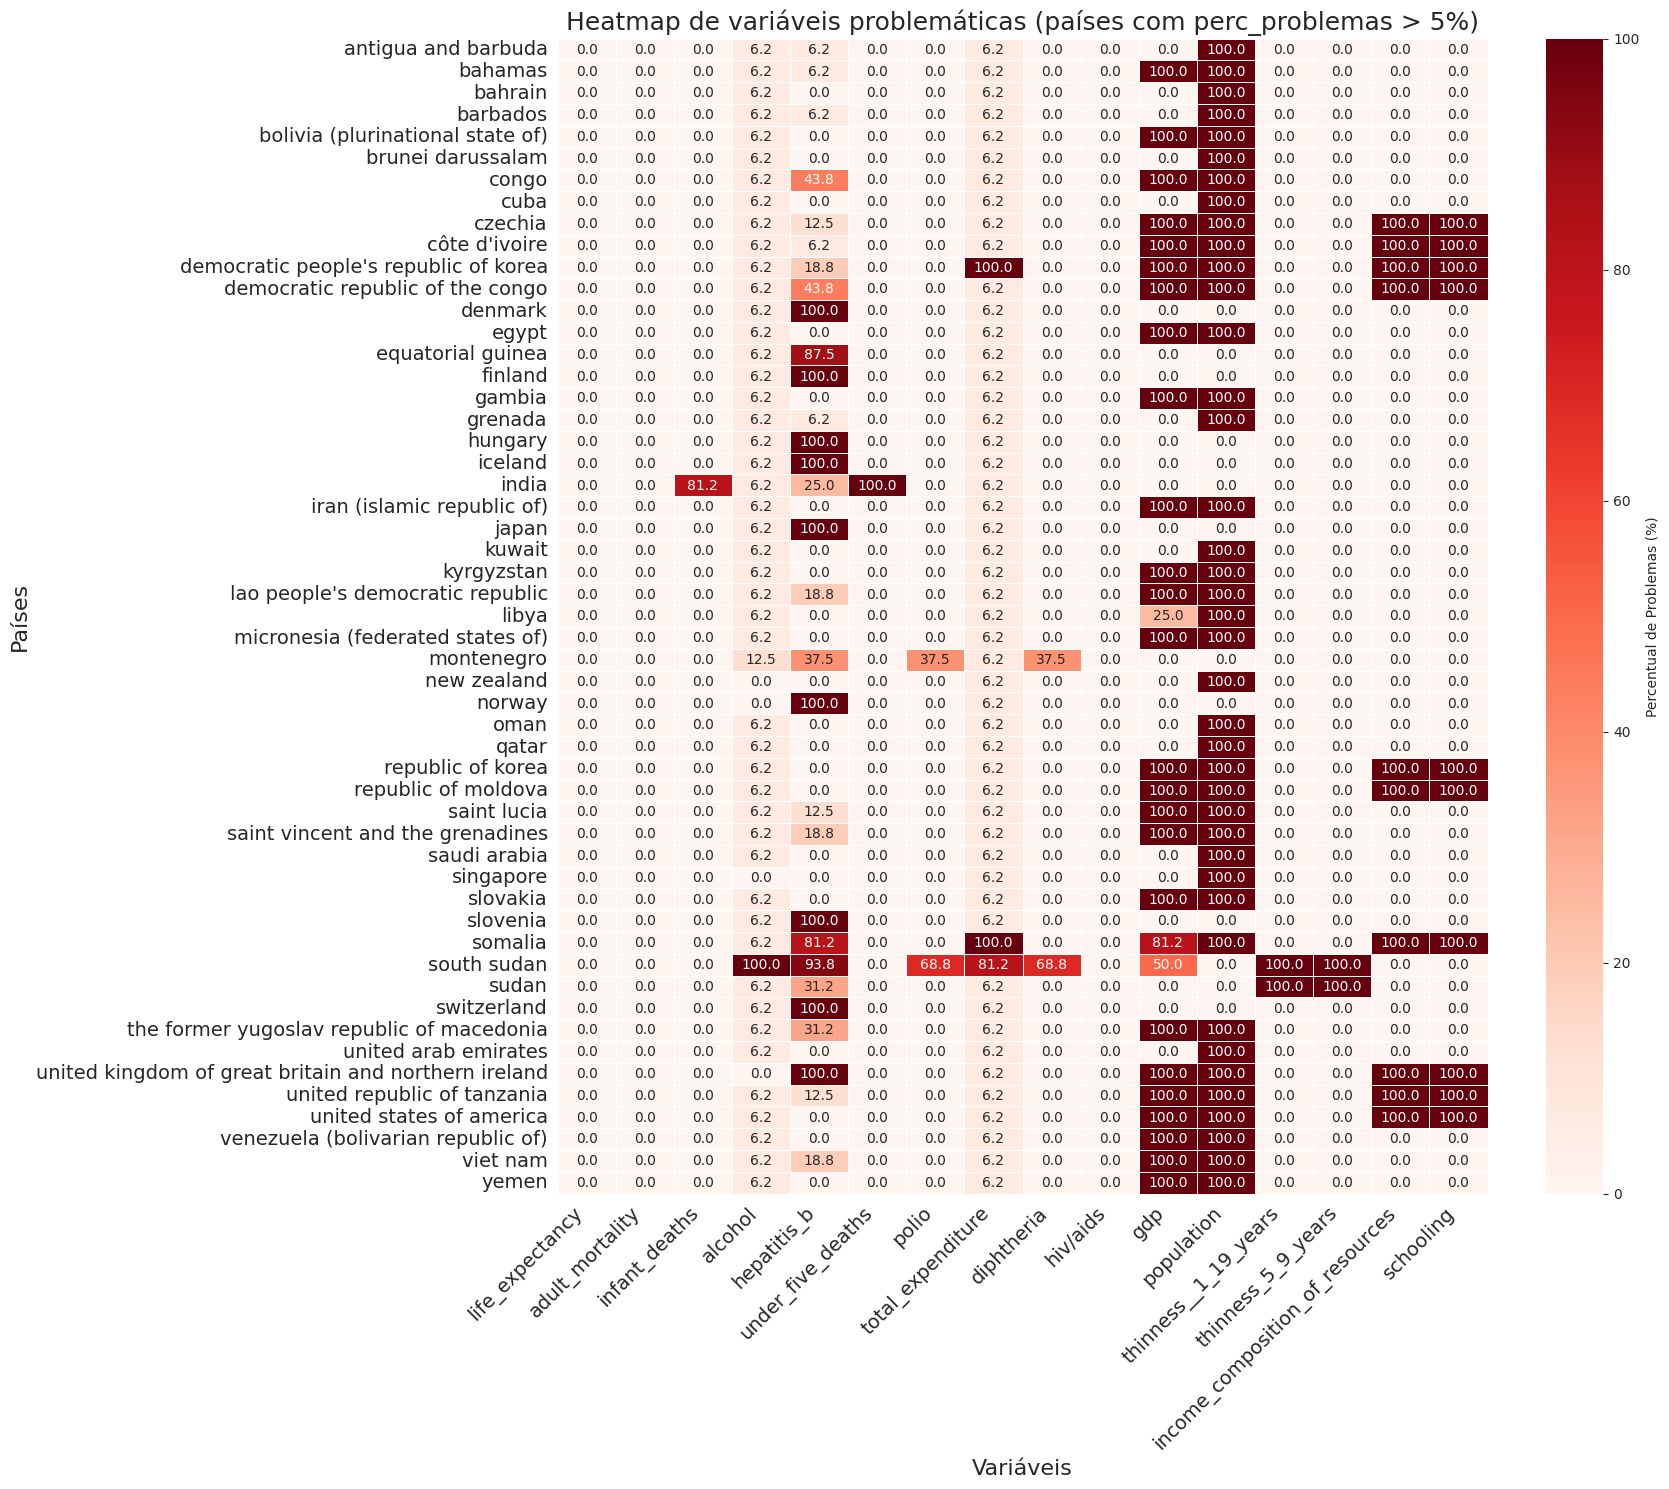

In [101]:
# Visualizando em formato HeatMap a distribuição de problemas para países que
# apresentaram uma taxa de dados problemáticos acima de 5%

# - Filtrando apenas países com perc_problemas > 5%
paises_selecionados = (
    tabela_problemas
    .loc[tabela_problemas['perc_problemas'] > 5, 'country']
    .unique()
    .tolist()
)

# - Filtrando dados de df_problemas apenas para esses países
df_problemas_filtrado = df_problemas.loc[df_problemas.index.isin(paises_selecionados)]

# - Remover colunas auxiliares para que só variáveis estejam presentes
colunas_variaveis = [c for c in df_problemas_filtrado.columns if c != 'perc_problemas']
heatmap_data = df_problemas_filtrado[colunas_variaveis]

# Construindo o heatmap (países no eixo y, variáveis no eixo x)
plt.figure(figsize=(15,15))
sns.heatmap(
    heatmap_data,
    cmap="Reds",
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Percentual de Problemas (%)'}
)
plt.title("Heatmap de variáveis problemáticas (países com perc_problemas > 5%)", fontsize=18)
plt.xlabel("Variáveis", fontsize=16)
plt.ylabel("Países", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()



Os problemas estão especialmente concentrados em gdp e population. No entanto, a variável population tem muita relevância para os objetivos da análise, assim não pode ser excluída.

O outro caminho é avaliar a correção ou exclusão dos países que apresentam os dados problemáticos para estas variáveis.

A correção ou obtenção dos dados pode ser realizada através de fontes oficiais como a ONU, no entanto, aqui o objetivo é apenas explorar e limpar o DataFrame. Assim, não irei proceder voltando a fase de coleta de dados e apenas trabalhar após esta etapa.

Antes de seguir para a identificação dos percentuais de dados problemáticos por variável em cada país é preciso observar outro possível problema. No DataFrame original haviam alguns países em que a série de dados para alguma variável estava totalmente zerada. Nesse caso, não se trata de dados reais, mas sim a falta destes dados. Os valores zerados não são reconhecidos como valores nulos, mas se permanecerem presentes no DataFrame podem causar interferências e erros nos resultados das análises.

Por isso, se faz importante verificar se há países com a série de dados zerada para alguma variável. Como eu já executei a exclusão de 10 países (que não tinham dados para toda a série temporal) e três variáveis (bmi, percentage_expenditure e measles), esse problema pode já ter sido eliminado.

In [102]:
# Verificando se há países com a série para alguma variável totalmente zerada

resultado_paises_zerados = df_copy_19.groupby('country', observed=True)['population'].apply(lambda x: (x==0).all())
print(resultado_paises_zerados.any())   # True se existe algum país com série inteira zerada

paises_zerados  = resultado_paises_zerados.sum()
print(f'\n{paises_zerados} apresentam uma série interia de valores zerados')   # número de países com série inteira zerada



False

0 apresentam uma série interia de valores zerados


Não há mais países com a série zerada par alguma variável

**Identificar e excluir países que possuem alta taxa de dados (>= 30%) problemáticos para alguma variável**


In [103]:
# Filtrando países com porcentagem igual ou maior de 30% de dados problemáticos por variável

# .ge(30) realiza a filtragem indicando maior ou igual a 30
paises_criticos = df_problemas[df_problemas.ge(30).any(axis=1)]

# Criando uma lista com os nomes dos países identificados
lista_paises_criticos = paises_criticos.index.tolist()

#print("DataFrame com países críticos: ")
#print(paises_criticos)

# Criando uma lista com os nomes dos países críticos (com problemas)
print("\nLista de países críticos: ")
print(lista_paises_criticos)

# Calculando quantos países foram identificados como críticos
n_paises_criticos = len(lista_paises_criticos)
print(f"\nNúmero de países críticos: {n_paises_criticos}")


Lista de países críticos: 
['angola', 'antigua and barbuda', 'bahamas', 'bahrain', 'barbados', 'bolivia (plurinational state of)', 'brunei darussalam', 'burkina faso', 'cambodia', 'cameroon', 'central african republic', 'chad', 'chile', 'congo', 'croatia', 'cuba', 'czechia', "côte d'ivoire", "democratic people's republic of korea", 'democratic republic of the congo', 'denmark', 'djibouti', 'egypt', 'equatorial guinea', 'ethiopia', 'finland', 'gabon', 'gambia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'haiti', 'hungary', 'iceland', 'india', 'iran (islamic republic of)', 'ireland', 'japan', 'kuwait', 'kyrgyzstan', "lao people's democratic republic", 'liberia', 'libya', 'mauritania', 'micronesia (federated states of)', 'montenegro', 'namibia', 'netherlands', 'new zealand', 'niger', 'nigeria', 'norway', 'oman', 'qatar', 'republic of korea', 'republic of moldova', 'saint lucia', 'saint vincent and the grenadines', 'saudi arabia', 'sierra leone', 'singapore', 'slovakia', 'slovenia

Dos 183 países restantes, 82 possuem dados problemáticos em uma taxa igual ou maior a 30% para pelo menos uma das variáveis.

A exclusão destes países será avaliada através de gráficos e comparações entre os valores da variável alvo (*life_expectancy*).

In [104]:
# Separando em dois DataFrames os países críticos (82) e os não críticos (101)

# Filtrando os países criticos para o DataFrame df_criticos
df_criticos = df_copy_19[df_copy_19['country'].isin(lista_paises_criticos)]
criticos = len(df_criticos['country'].unique())
print(f"Número de países no DataFrame críticos : {criticos}")

# Filtrando os países não críticos para o DataFrame df_outros
df_outros = df_copy_19[~df_copy_19['country'].isin(lista_paises_criticos)]
nao_criticos = len(df_outros['country'].unique())
print(f"\nNúmero de países no DataFrame não críticos : {nao_criticos}")

Número de países no DataFrame críticos : 82

Número de países no DataFrame não críticos : 101


Comparar life expectancy entre o grupo dos países críticos e dos não críticos

In [105]:
# Calculando estatísticas descritivas para os países críticos
print("Estatísticas - Países críticos: ")
print(df_criticos['life_expectancy'].describe())

# Calculando estatísticas descritivas para os países não críticos
print("\nEstatísticas - Outros países: ")
print(df_outros['life_expectancy'].describe())

Estatísticas - Países críticos: 
count    1312.000
mean       68.276
std        10.624
min        36.300
25%        59.000
50%        71.800
75%        76.500
max        89.000
Name: life_expectancy, dtype: float64

Estatísticas - Outros países: 
count    1616.000
mean       69.995
std         8.452
min        43.100
25%        65.500
50%        72.150
75%        75.000
max        89.000
Name: life_expectancy, dtype: float64


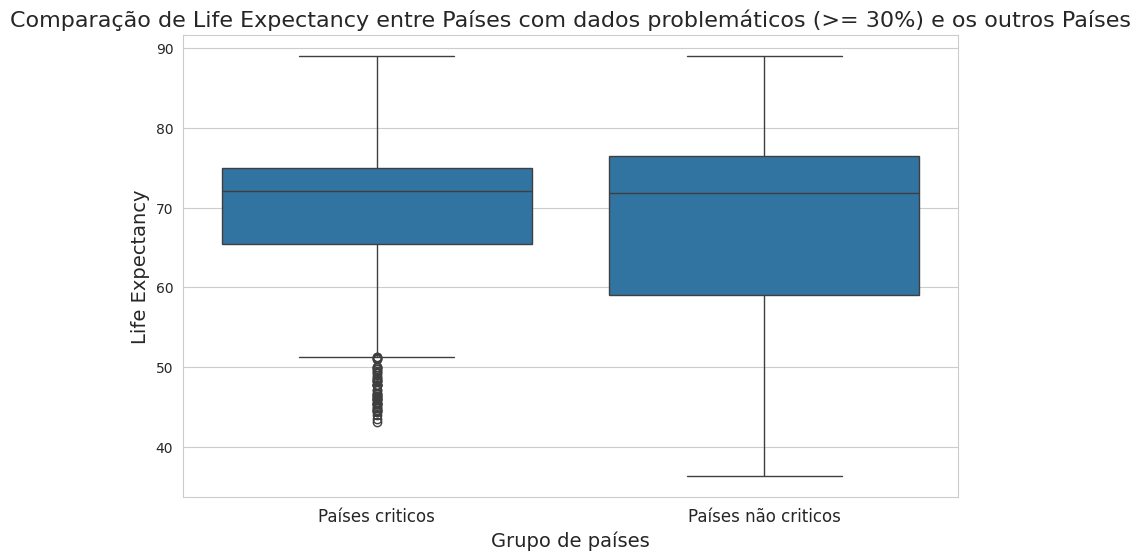

In [106]:
# Visualizando a diferença nos dados e life experctancy para os dois grupos
# de países através de boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data=df_copy_19, x=df_copy_19['country'].isin(lista_paises_criticos), y='life_expectancy')
plt.xticks([0, 1], ['Países criticos', 'Países não criticos'], fontsize=12)
plt.xlabel('Grupo de países', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.title('Comparação de Life Expectancy entre Países com dados problemáticos (>= 30%) e os outros Países', fontsize=16)
plt.show()

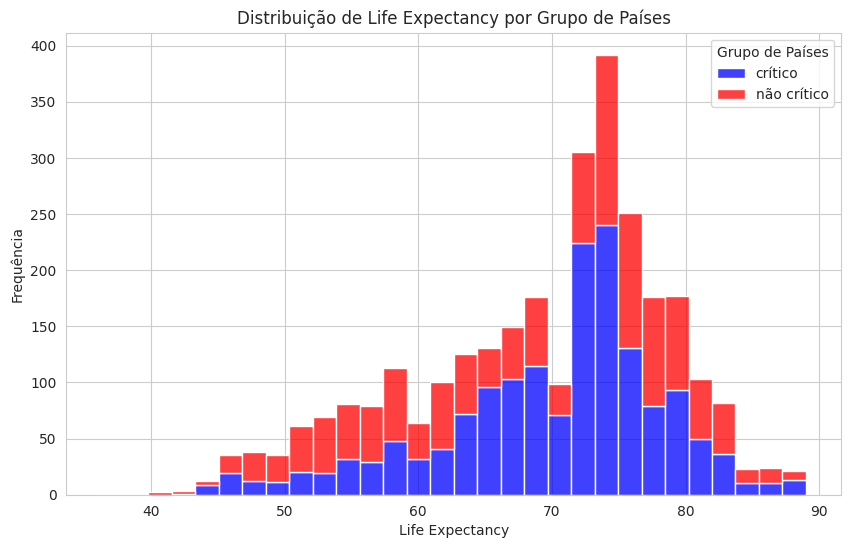

In [107]:
# Visualizando histograma entre a distribuição dos valores de life expectancy
# para o grupo de países críticos e o grupo de países não críticos

# Criando uma coluna temporária de classificação

df_copy_19['grupo_pais'] = df_copy_19['country'].apply(
    lambda x: 'critico' if x in lista_paises_criticos else 'nao_critico'
)

# Conferindo o resultado
#print(df_copy_19[['country', 'grupo_pais']].drop_duplicates().head(20))

# Criando o histograma
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_copy_19,
    x='life_expectancy',
    hue='grupo_pais',        # usa a coluna categórica
    multiple='stack',
    palette={'critico':'red','nao_critico':'blue'}  # indicando cores da legenda
)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequência')
plt.title('Distribuição de Life Expectancy por Grupo de Países')
plt.legend(title='Grupo de Países', labels=['crítico','não crítico'])
plt.show()


In [108]:
# Fazendo um teste entre os dois grupos para verificar se há diferença nos
# valores de life expectancy

from scipy.stats import ttest_ind, mannwhitneyu

# Extrair os valores da variável alvo para cada grupo
life_prob = df_criticos['life_expectancy'].dropna()
life_outros = df_outros['life_expectancy'].dropna()

# Teste t de Student (assumindo distribuições aproximadamente normais)
t_stat, p_val_t = ttest_ind(life_prob, life_outros, equal_var=False)

# Teste de Mann-Whitney (não paramétrico, mais robusto se distribuições
# não forem normais)
u_stat, p_val_u = mannwhitneyu(life_prob, life_outros, alternative='two-sided')

print("Teste t de Student:")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val_t:.5f}")

print("\nTeste de Mann-Whitney:")
print(f"U-statistic = {u_stat:.3f}, p-value = {p_val_u:.5f}")


Teste t de Student:
t-statistic = -4.764, p-value = 0.00000

Teste de Mann-Whitney:
U-statistic = 1008502.500, p-value = 0.02333


## Exclusão de Países Críticos

### Contexto
Durante a análise exploratória, foram identificados países com **30% ou mais de dados problemáticos** (nulos ou incongruentes) em pelo menos uma variável da série temporal. Esses países foram classificados como **críticos**.

### Evidências Estatísticas
- **Teste t de Student (Welch’s t-test)**: indicou diferença significativa entre as médias de *life expectancy* dos países críticos e não críticos (p < 0.001).  
- **Teste de Mann-Whitney**: confirmou diferença significativa nas distribuições (p ≈ 0.023).  
- **Boxplot comparativo**: mostrou que os países críticos apresentam expectativa de vida mais baixa e maior variabilidade.

### Interpretação
- Os países críticos não apenas possuem séries incompletas ou inconsistentes, mas também exibem **valores de expectativa de vida mais baixos e irregulares**.  
- Importante pontuar que a falta de informações pode ser inclusive um indício que de baixa qualidade de vida resultando em baixos índices socioeconômicos e uma baixa expectativa de vida. Essa observação pode trazer importância para a presença destes países nas análises caso se estabelecesse uma perspectiva diferente de análise. No entanto, vou me concentrar nas variáveis presentes e não nas ausentes nesse momento.
- Essa discrepância compromete a robustez das análises, pois o objetivo principal do banco de dados é **investigar quais variáveis influenciam a expectativa de vida**, e não comparar diferenças entre países.

### Decisão
Optou-se pela **exclusão dos países críticos** para:
- Garantir maior consistência e confiabilidade dos dados.  
- Evitar vieses estatísticos decorrentes de lacunas ou incongruências.  
- Manter o foco na análise multivariada dos determinantes da *life expectancy*.  

### Resultado
O conjunto final de dados preserva apenas países com séries consistentes, assegurando que as conclusões sobre os fatores que influenciam a expectativa de vida sejam mais sólidas e representativas.


Excluir todos os países que tiverem taxas iguais ou maiores que de 30% de dados problemáticos para alguma variável.

A análise final tem por objetivo compreender que variáveis influenciam na expectativa de vida, por isso, remover países não deve gerar problemas. Caso, o objetivo fosse compreender as diferenças e causas entre a expectativa de vida de diferentes países, a exclusão poderia causar problemas ao reduzir a representação geográfica e a complexidade socioeconômica dos países.

In [110]:
# Removendo os países com taxas de dados problemáticos iguais ou superiores a 30% para alguma variável.
# df_filtrado porque contém os países e variáveis filtrados após exclusões
df_filtrado = df_copy_19[~df_copy_19['country'].isin(lista_paises_criticos)].copy()

# Exibir o número de países presents no DataFrame após a exclusão dos países problemáticos
print('Número de países presentes no DataFrame df_filtrado após operações de exclusão:')
print(len(df_filtrado['country'].unique()))

Número de países presentes no DataFrame df_filtrado após operações de exclusão:
101


## Verificação da estrutura dos dados restantes no DataFrame antes de avançar para a imputação de dados

In [111]:
# Checando a presença de valores nulos por colunas

print("\nValores Faltantes (NaNs) restantes por coluna: ")
print((df_filtrado.isnull().sum()).sort_values(ascending=False))


Valores Faltantes (NaNs) restantes por coluna: 
total_expenditure                           102
hepatitis_b                                 101
alcohol                                      99
gdp                                          10
population                                    4
status                                        0
year                                          0
country                                       0
life_expectancy                               0
under_five_deaths                             0
adult_mortality                               0
infant_deaths                                 0
diphtheria                                    0
polio                                         0
hiv/aids                                      0
thinness__1_19_years                          0
thinness_5_9_years                            0
income_composition_of_resources               0
schooling                                     0
problema_life_expectancy               

In [124]:
# Aplicando novamente a função checar_dados_pais para checar se há valores
# fora dos intervalos e ou nulos por país

nova_tabela_qualidade = checar_dados_pais(df_filtrado, limites_19)
display(nova_tabela_qualidade)

,country,valores_nulos,valores_fora,total_problemas,perc_problemas
29,eritrea,12,0,12,2.083
40,iraq,9,0,9,1.562
14,bosnia and herzegovina,6,0,6,1.042
18,burundi,6,0,6,1.042
30,estonia,6,0,6,1.042
...,...,...,...,...,...
93,turkey,2,0,2,0.347
99,vanuatu,2,0,2,0.347
100,zimbabwe,2,0,2,0.347
0,afghanistan,0,0,0,0.000


In [125]:
# Calculando o número de valores fora dos limites no DataFrame após atualização
n_fora = nova_tabela_qualidade['valores_fora'].sum()
print(f'Foram identificados {n_fora} valores fora dos intervalos estabelecidos')

Foram identificados 0 valores fora dos intervalos estabelecidos


In [126]:
# Calculando o número de valores nulos no DataFrame após atualização
n_nulos = nova_tabela_qualidade['valores_nulos'].sum()
print(f'Foram identificados {n_nulos} valores nulos')

Foram identificados 316 valores nulos


Não há mais valores fora dos intervalos estabelecidos para as variáveis, no entanto, ainda há países com dados nulos em algumas variáveis.

Próximo passo: Explorar os países com dados nulos

In [134]:
# Cálculo do percentual de nulos por variável em cada país

perc_nulos_por_pais = df_filtrado.groupby('country', observed=True).apply(lambda g: g.isnull().mean())

# Filtrando apenas países com algum nulo
paises_com_nulos_series = perc_nulos_por_pais[perc_nulos_por_pais > 0].any(axis=1)

# Exibir apenas os países que possuem algum valor nulo (onde a série é True)
paises_com_nulos_filtrados = paises_com_nulos_series[paises_com_nulos_series]

# Calculando o número de países que ainda possuem algum valor nulo
n_nulos_paises = len(paises_com_nulos_filtrados)
print(f'O DataFrame df_filtrado ainda contém {n_nulos_paises} países com algum valor nulo')

print("\nPaíses com a presença de algum valor nulo:")
print(paises_com_nulos_filtrados)

O DataFrame df_filtrado ainda contém 99 países com algum valor nulo

Países com a presença de algum valor nulo:
country
algeria                   True
argentina                 True
armenia                   True
australia                 True
austria                   True
azerbaijan                True
bangladesh                True
belarus                   True
belgium                   True
belize                    True
benin                     True
bhutan                    True
bosnia and herzegovina    True
botswana                  True
brazil                    True
bulgaria                  True
burundi                   True
cabo verde                True
canada                    True
china                     True
colombia                  True
comoros                   True
costa rica                True
cyprus                    True
dominican republic        True
ecuador                   True
el salvador               True
eritrea                   True
estonia     

/tmp/ipython-input-1786784436.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  perc_nulos_por_pais = df_filtrado.groupby('country', observed=True).apply(lambda g: g.isnull().mean())


Dos países restantes no DataFrame df_filtrado, 99 ainda possuem algum valor nulo.

Anteriormente foi feita a exclusão dos países que possuiam 30% ou mais de valores nulos para alguma variável. Os 99 países indicados agora tem apenas uma pequena parte de cada variável como nulos e assim pode-se prosseguir com uma imputação para os dados faltantes.

# Agora imputação de dados

## 4 - Imputação de dados

## Contexto
Durante a etapa de preparação dos dados, foi realizada uma filtragem inicial para excluir países que apresentavam mais de **30% de valores nulos** em qualquer variável. Essa decisão garantiu que apenas países com séries temporais suficientemente completas fossem mantidos no conjunto de dados.

## Decisão de Imputação
Optou-se por aplicar **interpolação linear agrupada por país** (`groupby('country')`) para preencher os valores ausentes nas variáveis contínuas, como:
- `hepatitis_b`
- `total_expenditure`
- `alcohol`
- `gdp`
- `population`

## Justificativa
1. **Redução de risco de distorção**  
   Como os países com excesso de nulos foram previamente removidos, não há trechos longos de dados ausentes. Isso torna a interpolação linear mais confiável, evitando a criação de valores artificiais em grandes intervalos sem informação.

2. **Adequação às variáveis contínuas**  
   Variáveis como PIB, população e consumo de álcool apresentam evolução **gradual e temporalmente contínua**, o que se ajusta bem ao método de interpolação linear.

3. **Preservação da tendência temporal**  
   A interpolação linear mantém a coerência da série ao estimar valores intermediários com base nos vizinhos, evitando rupturas bruscas ou valores médios globais que poderiam mascarar a dinâmica de cada país.

4. **Simplicidade e eficiência**  
   O método é simples de implementar, computacionalmente eficiente e garante que o DataFrame final fique livre de valores nulos, facilitando análises posteriores e seleção de modelos.

## Conclusão
A combinação da **exclusão prévia de países com excesso de nulos** e da **interpolação linear por país** constitui uma estratégia robusta e adequada para este conjunto de dados. Essa abordagem equilibra qualidade estatística, preservação da estrutura temporal e praticidade na preparação para análises e modelagem.


"""
    Função para imputar valores nulos em múltiplas colunas de um DataFrame
    usando interpolação agrupada por país (ou outro agrupador).

    Parâmetros:
    -----------
    df : pd.DataFrame
        DataFrame original.
    colunas : list
        Lista de nomes das colunas que serão imputadas.
    grupo : str, opcional (default='country')
        Nome da coluna usada para agrupar (ex.: país).
    metodo : str, opcional (default='linear')
        Método de interpolação (linear, time, polynomial, etc.).

    Retorna:
    --------
    df : pd.DataFrame
        DataFrame com as colunas imputadas.
    """

In [149]:
# Removendo as colunas auxiliares para melhorar a visualização dos resultados
df_filtrado = df_filtrado.drop(columns=[c for c in df_filtrado.columns if c.startswith('problema_')])
df_filtrado.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'hepatitis_b', 'under_five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness__1_19_years', 'thinness_5_9_years',
       'income_composition_of_resources', 'schooling', 'grupo_pais'],
      dtype='object')

In [152]:
# Criando uma lista das variáveis que ainda contém valores nulos para serem imputadas
variaveis_com_nulos = ['hepatitis_b', 'total_expenditure', 'alcohol', 'gdp', 'population']
print(variaveis_com_nulos)

['hepatitis_b', 'total_expenditure', 'alcohol', 'gdp', 'population']


In [153]:
# Função para imputar valores em múltiplas variáveis contendo valores nulos
def imputar_interpolacao_multiplas(df, colunas, grupo='country', metodo='linear'):


    for coluna in colunas:
        df[coluna] = df.groupby(grupo, observed=True)[coluna].transform(
            lambda x: x.interpolate(method=metodo, limit_direction='both')
        )
        n_nulos = df[coluna].isnull().sum()
        print(f"NaNs restantes na coluna '{coluna}' após imputação: {n_nulos}")

    return df

# Aplicando a função imputar_interpolacao_multiplas
imputar_interpolacao_multiplas(df_filtrado, variaveis_com_nulos)

NaNs restantes na coluna 'hepatitis_b' após imputação: 0
NaNs restantes na coluna 'total_expenditure' após imputação: 0
NaNs restantes na coluna 'alcohol' após imputação: 0
NaNs restantes na coluna 'gdp' após imputação: 0
NaNs restantes na coluna 'population' após imputação: 0


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,grupo_pais
2,luxembourg,2008,developed,80.0,8.0,0,11.53,94.0,0,96.0,7.34,99.0,0.1,114293.843,4.886e+04,0.9,0.9,0.887,13.5,nao_critico
5,luxembourg,2011,developed,88.0,72.0,0,11.50,95.0,0,96.0,7.34,99.0,0.1,115761.577,5.183e+05,0.9,0.9,0.894,13.9,nao_critico
6,luxembourg,2014,developed,81.7,65.0,0,11.12,94.0,0,99.0,6.94,99.0,0.1,119172.742,5.563e+05,1.0,0.9,0.892,13.9,nao_critico
7,luxembourg,2013,developed,81.4,68.0,0,11.02,94.0,0,99.0,7.10,99.0,0.1,113751.850,5.434e+04,0.9,0.9,0.892,13.9,nao_critico
8,luxembourg,2006,developed,79.4,85.0,0,11.98,95.0,0,99.0,7.75,99.0,0.1,89739.712,4.726e+05,0.9,0.9,0.880,13.5,nao_critico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,zimbabwe,2004,developing,44.3,723.0,27,4.36,68.0,42,67.0,7.13,65.0,33.6,454.367,1.278e+07,9.4,9.4,0.407,9.2,nao_critico
2934,zimbabwe,2003,developing,44.5,715.0,26,4.06,7.0,41,7.0,6.52,68.0,36.7,453.351,1.263e+07,9.8,9.9,0.418,9.5,nao_critico
2935,zimbabwe,2002,developing,44.8,73.0,25,4.43,73.0,40,73.0,6.53,71.0,39.8,57.348,1.255e+05,1.2,1.3,0.427,10.0,nao_critico
2936,zimbabwe,2001,developing,45.3,686.0,25,1.72,76.0,39,76.0,6.16,75.0,42.1,548.587,1.237e+07,1.6,1.7,0.427,9.8,nao_critico


In [154]:
# Conferindo se ainda há algum valor nulo
df_filtrado.isnull().sum()

,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
hepatitis_b,0
under_five_deaths,0
polio,0


Não há mais valores nulos no DataFrame.

Próximo passo: Verificação de outliers

## 4 - Verificação de outlyers

In [155]:
# Visualização das estatísticas descritivas das variáveis
pd.options.display.float_format = '{:.2f}'.format
df_filtrado = pd.DataFrame(df_filtrado)
df_filtrado.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00
mean,2007.50,70.00,163.22,21.67,4.58,81.06,28.49,85.03,5.93,85.51,1.91,5596.00,11064795.42,4.60,4.70,0.64,12.27
std,4.61,8.45,122.91,53.69,4.03,24.37,67.89,21.64,2.24,20.78,6.26,11366.15,28679590.37,4.37,4.48,0.19,2.80
min,2000.00,43.10,1.00,0.00,0.01,2.00,0.00,5.00,1.10,5.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2003.75,65.50,78.00,0.00,0.85,76.00,1.00,83.00,4.47,83.00,0.10,456.68,182887.50,1.60,1.60,0.54,10.60
50%,2007.50,72.15,145.00,3.00,3.88,92.00,4.00,94.00,5.81,93.00,0.10,1705.26,1357211.00,2.80,2.90,0.68,12.40
75%,2011.25,75.00,217.00,21.00,7.32,96.00,25.00,97.00,7.44,97.00,0.40,4778.25,7385084.00,6.60,6.70,0.76,14.10
max,2015.00,89.00,723.00,490.00,17.87,99.00,608.00,99.00,13.73,99.00,50.60,119172.74,258162113.00,22.20,22.60,0.94,20.70


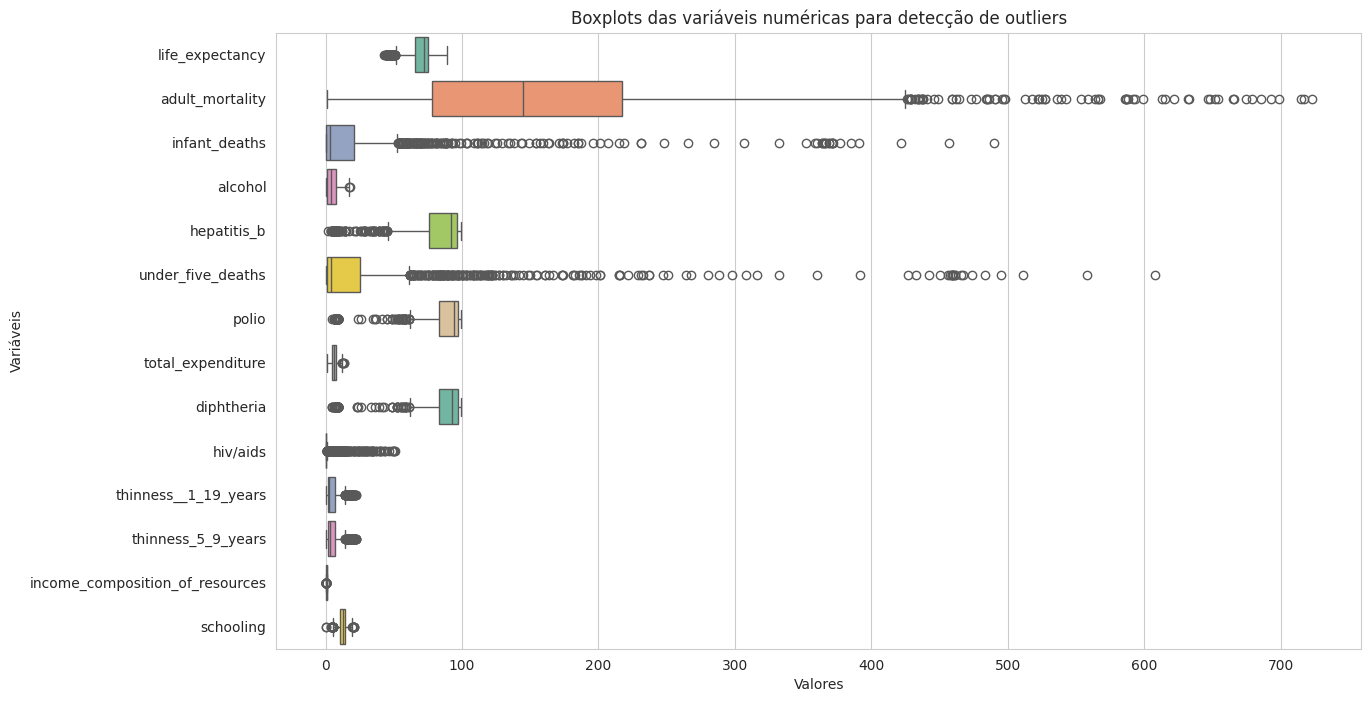

In [164]:
# Selecionar apenas variáveis numéricas
df_num = df_filtrado.select_dtypes(include=['float64','int64'])
# Removendo ano que não precisa ser tratado como variável aqui
df_num = df_num.drop(columns=['year'])
# Removendo population e gdp do gráfico para melhorar a visualização
df_num_reduzida = df_num.drop(columns=['population', 'gdp'])

# Boxplots para todas as variáveis numéricas
plt.figure(figsize=(14,8))
sns.boxplot(data=df_num_reduzida, orient='h', palette='Set2')
plt.title('Boxplots das variáveis numéricas para detecção de outliers')
plt.xlabel('Valores')
plt.ylabel('Variáveis')
plt.show()



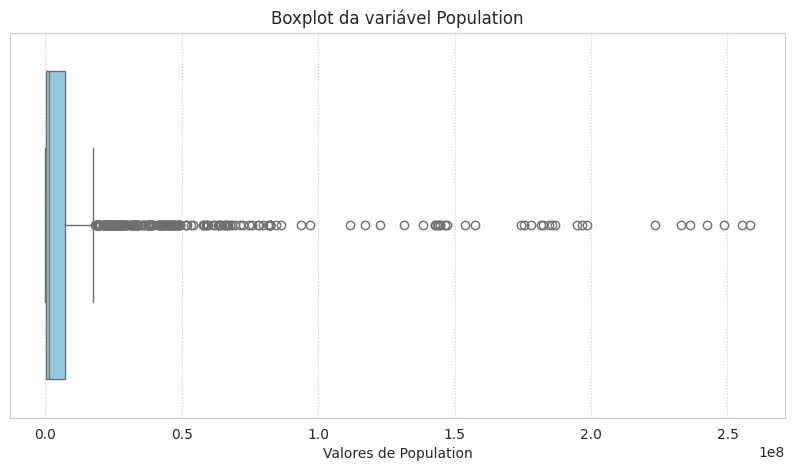

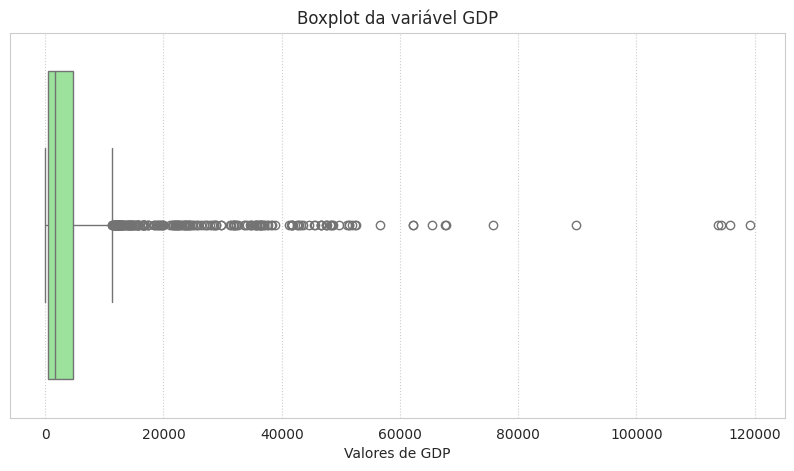

In [163]:
# Boxplots para as variáveis numéricas population e gdp

# Boxplot para 'population'
plt.figure(figsize=(10,5))
sns.boxplot(x=df_num['population'], color='skyblue')
plt.title('Boxplot da variável Population')
plt.xlabel('Valores de Population')
plt.grid(True, axis='x', linestyle=':')
plt.show()

# Boxplot para 'gdp'
plt.figure(figsize=(10,5))
sns.boxplot(x=df_num['gdp'], color='lightgreen')
plt.title('Boxplot da variável GDP')
plt.xlabel('Valores de GDP')
plt.grid(True, axis='x', linestyle=':')
plt.show()


In [165]:
# Detectando outliers via IQR
outliers = {}
for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers[col] = df_num[(df_num[col] < limite_inferior) | (df_num[col] > limite_superior)][col]

# Exibindo resumo
for var, vals in outliers.items():
    print(f"\nOutliers detectados em {var}:")
    print(vals)



Outliers detectados em life_expectancy:
708    48.10
738    47.80
801    46.00
876    46.70
884    46.40
956    47.80
1166   51.10
1203   47.10
1221   46.40
1286   49.40
1336   47.80
1412   50.00
1431   45.30
1451   44.80
1526   51.20
1530   45.10
1531   44.50
1618   49.00
1657   50.00
1667   51.00
1690   49.80
1714   47.80
1726   49.50
1730   45.60
1763   45.40
1812   49.30
1813   46.60
1842   47.70
1855   48.40
1876   49.80
1890   46.60
1916   48.20
1950   48.30
2007   43.10
2021   43.50
2093   46.20
2110   44.60
2158   47.10
2167   46.00
2177   46.00
2192   45.50
2206   51.00
2209   44.60
2213   48.50
2228   44.00
2236   51.20
2238   46.40
2255   45.90
2259   48.80
2303   50.00
2311   45.30
2321   48.60
2933   44.30
2934   44.50
2935   44.80
2936   45.30
2937   46.00
Name: life_expectancy, dtype: float64

Outliers detectados em adult_mortality:
403    428.00
482    486.00
491    449.00
496    473.00
514    438.00
516    496.00
528    498.00
583    566.00
589    497.00
659    485.00

In [168]:
# Exibindo as linhas onde a variável schooling é igual a 0
df_filtrado.loc[df_filtrado['schooling'] == 0]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,grupo_pais
1134,bosnia and herzegovina,2000,developing,74.60,116.00,0,3.64,89.50,0,87.00,7.90,85.00,0.10,1461.76,376676.00,3.30,3.20,0.00,0.00,nao_critico
1351,turkmenistan,2000,developing,63.80,224.00,7,2.90,97.33,9,98.00,3.94,97.00,0.10,643.18,4516131.00,3.60,3.60,0.00,0.00,nao_critico


Criar uma função para identificar e imputar valores em dados zerados que podem ter sido resultado de erros ou falta de dados

    Função para substituir valores 0 por NaN e imputar pela média do país.
    
    Parâmetros:
    -----------
    df : pd.DataFrame
        DataFrame original.
    colunas : list
        Lista de colunas onde 0 não faz sentido e deve ser tratado como NaN.
    grupo : str, opcional (default='country')
        Nome da coluna usada para agrupar (ex.: país).
    
    Retorna:
    --------
    df : pd.DataFrame
        DataFrame com as colunas imputadas pela média do país.
  

In [169]:
# Criando uma função para identificar e imputar valores em dados zerados

def imputar_media_pais(df, colunas, grupo='country'):

    for coluna in colunas:
        # Substitui zeros por NaN
        df[coluna] = df[coluna].replace(0, pd.NA)

        # Imputa pela média do país
        df[coluna] = df.groupby(grupo)[coluna].transform(
            lambda x: x.fillna(x.mean())
        )

        # Verificação
        n_nulos = df[coluna].isnull().sum()
        print(f"NaNs restantes na coluna '{coluna}' após imputação: {n_nulos}")

    return df

# Exemplo de uso
variaveis_invalidas = [
    'schooling',
    'income_composition_of_resources',
    'gdp',
    'population'
]

df_copy = imputar_media_pais(df_copy, variaveis_invalidas)


/tmp/ipython-input-3140161182.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[coluna] = df.groupby(grupo)[coluna].transform(
/tmp/ipython-input-3140161182.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mean())


NaNs restantes na coluna 'schooling' após imputação: 165
NaNs restantes na coluna 'income_composition_of_resources' após imputação: 167
NaNs restantes na coluna 'gdp' após imputação: 405
NaNs restantes na coluna 'population' após imputação: 648


In [174]:
# Conferindo se ainda há algum valor nulo
df_filtrado.isnull().sum()

,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
hepatitis_b,0
under_five_deaths,0
polio,0


In [175]:
# Visualizando novamente as estatísticas descritivas das variáveis
pd.options.display.float_format = '{:.2f}'.format
df_filtrado = pd.DataFrame(df_filtrado)
df_filtrado.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00
mean,2007.50,70.00,163.22,21.67,4.58,81.06,28.49,85.03,5.93,85.51,1.91,5596.00,11064795.42,4.60,4.70,0.64,12.27
std,4.61,8.45,122.91,53.69,4.03,24.37,67.89,21.64,2.24,20.78,6.26,11366.15,28679590.37,4.37,4.48,0.19,2.80
min,2000.00,43.10,1.00,0.00,0.01,2.00,0.00,5.00,1.10,5.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2003.75,65.50,78.00,0.00,0.85,76.00,1.00,83.00,4.47,83.00,0.10,456.68,182887.50,1.60,1.60,0.54,10.60
50%,2007.50,72.15,145.00,3.00,3.88,92.00,4.00,94.00,5.81,93.00,0.10,1705.26,1357211.00,2.80,2.90,0.68,12.40
75%,2011.25,75.00,217.00,21.00,7.32,96.00,25.00,97.00,7.44,97.00,0.40,4778.25,7385084.00,6.60,6.70,0.76,14.10
max,2015.00,89.00,723.00,490.00,17.87,99.00,608.00,99.00,13.73,99.00,50.60,119172.74,258162113.00,22.20,22.60,0.94,20.70


### Tratamento de outliers

Durante a análise exploratória, identificamos outliers em diversas variáveis. Após avaliação:

- **Mantidos**: valores extremos plausíveis que refletem realidades específicas (ex.: baixa expectativa de vida, alta mortalidade adulta, consumo elevado de álcool, PIB elevado, populações grandes, prevalência de HIV/AIDS).  


**Justificativa:**
- A manutenção de outliers plausíveis preserva a variabilidade real dos dados.  
- A substituição por NaN evita distorções causadas por valores que não representam medições válidas.  


# Estratégia de Tratamento de Valores Zero

## Contexto
Durante a análise exploratória, foi identificado que diversas variáveis apresentavam valores mínimos iguais a **0**. Em alguns casos, esse valor é plausível e representa uma realidade possível; em outros, o zero não faz sentido e provavelmente corresponde a dados faltantes ou erros de codificação.

## Variáveis onde **faz sentido ter 0**
- **infant_deaths**: países podem registrar anos sem mortes infantis.  
- **under_five_deaths**: similar ao caso anterior, é plausível que em determinados anos não haja óbitos.  
- **hiv/aids**: alguns países podem ter prevalência nula ou próxima de zero.  
- **alcohol**: consumo per capita pode ser zero em países com restrições culturais ou religiosas.  
- **life_expectancy**: não tem zero, mas valores baixos são plausíveis; incluído aqui apenas para reforçar que não há zeros artificiais.  

Nesses casos, os valores **0 foram mantidos**, pois refletem situações reais e não distorcem a análise.

## Variáveis onde **não faz sentido ter 0**
- **schooling**: anos médios de escolaridade não podem ser zero em países inteiros.  
- **income_composition_of_resources**: índice de composição de recursos não pode ser zero, pois sempre há algum nível de renda.  
- **gdp**: Produto Interno Bruto não pode ser zero para países inteiros.  
- **population**: população não pode ser zero em países existentes.  
- **hepatitis_b, polio, diphtheria**: cobertura vacinal reportada como zero provavelmente indica ausência de dado, não ausência de vacinação.  
- **total_expenditure**: gasto público em saúde não pode ser zero, o valor zero indica dado faltante.

Nesses casos, os valores **0 foram tratados como `NaN`** e imputados pela **média do país**, garantindo maior consistência e preservando a coerência estatística.

## Decisão
1. **Zeros plausíveis** → mantidos como valores reais.  
2. **Zeros incoerentes** → substituídos por `NaN` e imputados pela média do país.  

## Justificativa
- **Consistência**: evita que zeros artificiais distorçam análises e modelos.  
- **Contexto nacional**: a média por país preserva características específicas de cada região.  
- **Robustez**: reduz o impacto de valores faltantes sem introduzir tendências externas.

## Conclusão
Essa abordagem garante maior qualidade dos dados, evitando interpretações equivocadas e preparando o conjunto para análises mais confiáveis e modelagem preditiva.
